In [6]:
#Author: Tahís Ahtty
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
nltk.download('stopwords')
import string
import re
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [3]:
#import spacy
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [4]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [8]:
import tempfile
##Cambiar al path correspondiente en su directorio
articles_extendido=pd.read_csv("C:/Users/User/Thalia/Espol/2018-2S/Mineria/noticiasVenezuela/noticias_Venezuela_extendido.csv")
articles_extendido

fecha_string                fecha  \
0     2018-02-04  2018-02-04T15:47:00   
1     2018-02-12  2018-02-12T14:19:00   
2     2018-02-12  2018-02-12T18:10:00   
3     2018-02-12  2018-02-12T00:00:00   
4     2018-02-14  2018-02-14T00:00:00   
5     2018-04-09  2018-04-09T19:02:00   
6     2018-04-09  2018-04-09T17:26:00   
7     2018-04-09  2018-04-09T08:21:00   
8     2018-04-10  2018-04-10T00:00:00   
9     2018-04-10  2018-04-10T07:17:00   
10    2018-04-11  2018-04-11T17:39:00   
11    2018-04-13  2018-04-13T00:00:00   
12    2018-04-13  2018-04-13T18:11:00   
13    2018-04-13  2018-04-13T00:00:00   
14    2018-04-14  2018-04-14T16:50:00   
15    2018-04-14  2018-04-14T16:03:00   
16    2018-04-15  2018-04-15T14:21:00   
17    2018-04-16  2018-04-16T20:43:00   
18    2018-04-18  2018-04-18T22:38:00   
19    2018-04-19  2018-04-19T07:58:00   
20    2018-04-19  2018-04-19T00:00:00   
21    2018-04-20  2018-04-20T19:10:00   
22    2018-04-21  2018-04-21T21:57:00   
23    2018-04-23  2018-04-23T00:00:00   
24    2018-04-23  2018-04-23T00:00:00   
25    2018-04-23  2018-04-23T00:00:00   
26    2018-04-23  2018-04-23T00:00:00   
27    2018-04-23  2018-04-23T00:00:00   
28    2018-04-23  2018-04-23T00:00:00   
29    2018-04-23  2018-04-23T00:00:00   
..           ...                  ...   
283   2018-10-21  2018-10-21T00:00:00   
284   2018-10-22  2018-10-22T00:00:00   
285   2018-10-23  2018-10-23T00:00:00   
286   2018-10-23  2018-10-23T00:00:00   
287   2018-10-31  2018-10-31T00:00:00   
288   2018-10-31  2018-10-31T00:00:00   
289   2018-11-01  2018-11-01T00:00:00   
290   2018-11-03  2018-11-03T00:00:00   
291   2018-11-08  2018-11-08T00:00:00   
292   2018-11-09  2018-11-09T00:00:00   
293   2018-11-12  2018-11-12T00:00:00   
294   2018-11-13  2018-11-13T00:00:00   
295   2018-11-16  2018-11-16T00:00:00   
296   2018-11-18  2018-11-18T00:00:00   
297   2018-11-20  2018-11-20T00:00:00   
298   2018-11-20  2018-11-20T00:00:00   
299   2018-11-21  2018-11-21T00:00:00   
300   2018-11-21  2018-11-21T00:00:00   
301   2018-11-21  2018-11-21T00:00:00   
302   2018-11-22  2018-11-22T00:00:00   
303   2018-11-23  2018-11-23T16:09:00   
304   2018-11-23  2018-11-23T00:00:00   
305   2018-11-24  2018-11-24T00:00:00   
306   2018-11-30  2018-11-30T00:00:00   
307   2018-12-03  2018-12-03T16:09:00   
308   2018-12-04  2018-12-04T15:47:00   
309   2018-12-12  2018-12-12T00:00:00   
310   2018-12-12  2018-12-12T18:10:00   
311   2018-12-12  2018-12-12T14:19:00   
312   2018-12-14  2018-12-14T00:00:00   

                                                   url  \
0    https://www.eluniverso.com/noticias/2018/12/04...   
1    https://www.eluniverso.com/noticias/2018/12/12...   
2    https://www.eluniverso.com/noticias/2018/12/12...   
3    https://www.eluniverso.com/noticias/2018/12/12...   
4    https://www.eluniverso.com/noticias/2018/12/13...   
5    https://www.eluniverso.com/noticias/2018/04/09...   
6    https://www.eluniverso.com/noticias/2018/04/09...   
7    https://www.eluniverso.com/entretenimiento/201...   
8    https://www.eluniverso.com/noticias/2018/04/10...   
9    https://www.eluniverso.com/noticias/2018/04/10...   
10   https://www.eluniverso.com/noticias/2018/04/11...   
11   https://www.eluniverso.com/noticias/2018/04/13...   
12   https://www.eluniverso.com/noticias/2018/04/13...   
13   https://www.eluniverso.com/noticias/2018/04/13...   
14   https://www.eluniverso.com/noticias/2018/04/14...   
15   https://www.eluniverso.com/noticias/2018/04/14...   
16   https://www.eluniverso.com/noticias/2018/04/15...   
17   https://www.eluniverso.com/noticias/2018/04/16...   
18   https://www.eluniverso.com/noticias/2018/04/18...   
19   https://www.eluniverso.com/noticias/2018/04/19...   
20   https://www.eluniverso.com/noticias/2018/04/19...   
21   https://www.eluniverso.com/noticias/2018/04/20...   
22   https://www.eluniverso.com/noticias/2018/04/19...   
23   https://www.eluniverso.com/guayaquil/2018/04/2...   
24   https:

# LDA con tópicos a toda la data
## LDA opción 1

In [24]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "c:\users\user\appdata\local\temp" will be used to save temporary dictionary and corpus.


In [25]:
noticias = articles_extendido
corpus=[]
a=[]
for i in range(len(noticias['texto'])):
        a=noticias['texto'][i]
        corpus.append(a)

In [26]:
noticias.texto=noticias['texto'].apply(lambda x:str(x))
noticias.texto.head(20)

0     Ginebra -Naciones Unidas dijo el martes que bu...
1     Peinados a cambio de publicidad, un nuevo códi...
2     Washington -Colombia pidió el miércoles a los ...
3     El presidente de Venezuela, Nicolás Maduro, re...
4     Caracas -Con cuidado, el hombre escoge las hoj...
5     El gobierno de Sebastián Piñera anunció este l...
6     El Tribunal Supremo de Justicia de Venezuela, ...
7     El cantante Ricardo Montaner y la organización...
8     El tema Venezuela sigue siendo frecuente entre...
9     La Fiscalía General anunció que España apresó ...
10    España y Venezuela mostraron su disposición a ...
11    Los tribunales militares venezolanos están vio...
12    El gobierno venezolano planea elevar a un mill...
13    La crisis venezolana también estará “en el top...
14    El vicepresidente de Estados Unidos, Mike Penc...
15    Ecuador exhortó este sábado al gobierno de Nic...
16    El presidente venezolano, Nicolás Maduro, reci...
17    El consulado de Chile en Caracas amaneció 

In [27]:
from nltk.corpus import stopwords
from string import punctuation
import os

# remove common words and tokenize
list1 = ['Venezuela','Maduro','venezolano','venezolanos','venezonlanas']
stoplist = stopwords.words('spanish') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
print(dictionary)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if __name__ == '__main__':


Dictionary(10418 unique tokens: [u'detenci\xf3n', u'1,8', u'1,9', u'1,6', u'bloqueos']...)


In [28]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)
from gensim import corpora, models, similarities
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus] 

In [29]:
total_topics = 5
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] 
lda.show_topics(total_topics,5)
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
df_lda

(48, 5)
(5, 48)


20   anunció       año      años     años,  bolívares   caracas  \
0  0.000000  0.000000  0.000000  0.000000  0.000000   0.001533  0.001722   
1  0.000000  0.000000  0.001563  0.000000  0.000000   0.000000  0.002499   
2  0.000000  0.002103  0.000000  0.000000  0.000000   0.000000  0.002877   
3  0.000000  0.000000  0.000000  0.001849  0.000000   0.000000  0.002166   
4  0.001489  0.000000  0.000000  0.000000  0.001504   0.000000  0.000000   

   colombia  colombia,    crisis     ...          perú  presidente     según  \
0  0.000000   0.000000  0.004878     ...      0.000000    0.003996  0.002578   
1  0.000000   0.000000  0.004322     ...      0.001923    0.003451  0.002107   
2  0.001581   0.001690  0.003411     ...      0.000000    0.005650  0.002169   
3  0.000000   0.001681  0.003920     ...      0.000000    0.006202  0.002237   
4  0.001728   0.000000  0.002680     ...      0.000000    0.002906  0.002241   

   situación   también      tras      tres    unidos  venezuela  venezuela,  
0   0.000000  0.001795  0.000000  0.000000  0.000000   0.004977    0.001891  
1   0.000000  0.000000  0.001659  0.001581  0.000000   0.005367    0.002075  
2   0.000000  0.001668  0.001755  0.000000  0.000000   0.004250    0.003391  
3   0.000000  0.000000  0.001912  0.000000  0.001644   0.009571    0.002868  
4   0.001727  0.001840  0.000000  0.000000  0.000000   0.004801    0.002235  

[5 rows x 48 columns]

----------------Cluster map de correlaciones cruzadas entre el top 50 de palabras--------------


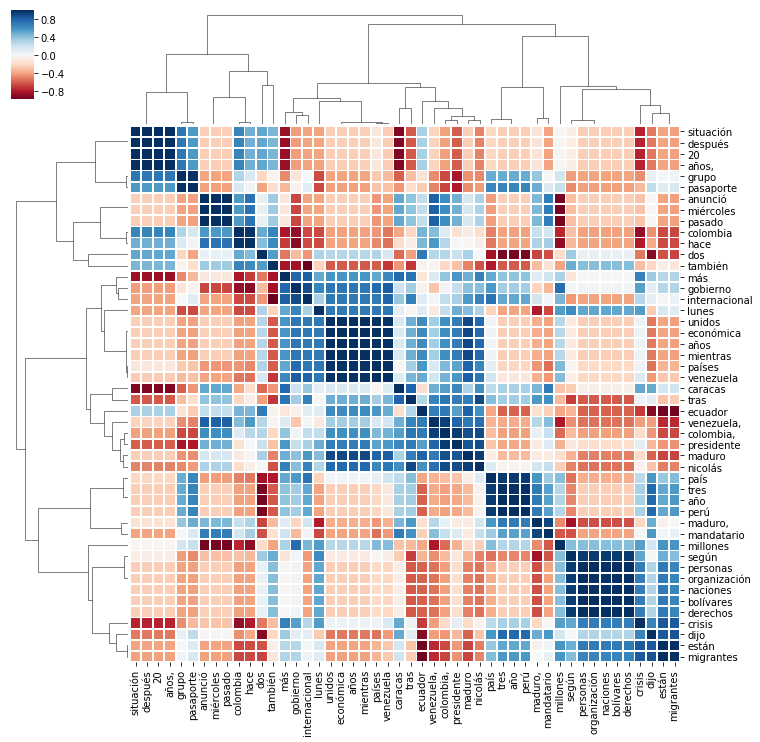

In [35]:
print('----------------Cluster map de correlaciones cruzadas entre el top 50 de palabras--------------')
g=sb.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [32]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

C:\Users\User\Anaconda2\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
0      35.710926        1       1    9.996505 -222.929092
1      34.013714        1       2   54.630600   55.189125
3      10.157491        1       3  180.913223  -32.649052
4      10.059021        1       4  -14.773765  -76.314064
2      10.058851        1       5  157.431244 -179.040527, topic_info=      Category      Freq           Term     Total  loglift  logprob
term                                                               
2856   Default  1.000000         maduro  1.000000  30.0000  30.0000
5481   Default  1.000000      venezuela  1.000000  29.0000  29.0000
1888   Default  1.000000     presidente  1.000000  28.0000  28.0000
8467   Default  1.000000        nicolás  1.000000  27.0000  27.0000
452    Default  1.000000       gobierno  1.000000  26.0000  26.0000
7070   Default  0.000000         países  0.000000  25.0000  25.0000
9390   Default  0.000000        ecuador  0.000000  24.0000  24.0000
2602   Default  0.000000     venezuela,  0.000000  23.0000  23.0000
4221   Default  1.000000           país  1.000000  22.0000  22.0000
8763   Default  1.000000            más  1.000000  21.0000  21.0000
5564   Default  0.000000            dos  0.000000  20.0000  20.0000
1959   Default  0.000000        caracas  0.000000  19.0000  19.0000
8586   Default  1.000000         crisis  1.000000  18.0000  18.0000
10132  Default  1.000000           dijo  1.000000  17.0000  17.0000
3425   Default  0.000000        anunció  0.000000  16.0000  16.0000
8344   Default  0.000000        maduro,  0.000000  15.0000  15.0000
5237   Default  0.000000          según  0.000000  14.0000  14.0000
8884   Default  0.000000      miércoles  0.000000  13.0000  13.0000
9373   Default  0.000000       colombia  0.000000  12.0000  12.0000
2389   Default  0.000000        también  0.000000  11.0000  11.0000
9413   Default  0.000000     mandatario  0.000000  10.0000  10.0000
3641   Default  0.000000         unidos  0.000000   9.0000   9.0000
10043  Default  0.000000        después  0.000000   8.0000   8.0000
8946   Default  0.000000      situación  0.000000   7.0000   7.0000
4186   Default  0.000000         pasado  0.000000   6.0000   6.0000
9989   Default  0.000000           tras  0.000000   5.0000   5.0000
2465   Default  0.000000      económica  0.000000   4.0000   4.0000
3784   Default  0.000000      colombia,  0.000000   3.0000   3.0000
3416   Default  0.000000           años  0.000000   2.0000   2.0000
8837   Default  0.000000           hace  0.000000   1.0000   1.0000
...        ...       ...            ...       ...      ...      ...
7487    Topic5  0.036753            mil  0.189821   0.6548  -6.7530
4371    Topic5  0.039210       frontera  0.208074   0.6278  -6.6883
1959    Topic5  0.090565        caracas  0.658914   0.3122  -5.8512
9413    Topic5  0.059433     mandatario  0.393511   0.4064  -6.2724
8111    Topic5  0.039289       decisión  0.228888   0.5344  -6.6863
6495    Topic5  0.033086        general  0.180669   0.5992  -6.8581
9390    Topic5  0.070321        ecuador  0.548822   0.2420  -6.1042
4186    Topic5  0.054594         pasado  0.378003   0.3617  -6.3573
9373    Topic5  0.049778       colombia  0.330364   0.4041  -6.4497
10132   Topic5  0.136834           dijo  1.533762  -0.1200  -5.4385
3641    Topic5  0.040611         unidos  0.247106   0.4909  -6.6532
8837    Topic5  0.055425           hace  0.404966   0.3079  -6.3422
8763    Topic5  0.111204            más  1.192794  -0.0760  -5.6459
8344    Topic5  0.074712        maduro,  0.649635   0.1340  -6.0436
5481    Topic5  0.133797      venezuela  1.716902  -0.2552  -5.4609
8586    Topic5  0.107378         crisis  1.321721  -0.2136  -5.6809
4221    Topic5  0.110171           país  1.386802  -0.2360  -5.6552
3784    Topic5  0.053220      colombia,  0.408004   0.2599  -6.3828
10043   Topic5  0.039599        después  0.246775   0.4671  -6.6784
3970    Topic5 

## LDA opción 2

In [39]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

noticias['noticias_punct'] = noticias['texto'].apply(lambda x: remove_punct(x))
sid = SentimentIntensityAnalyzer() 
noticias["sentimiento"] = noticias["texto"].apply(lambda x: sid.polarity_scores(x)["compound"])
noticias.head(20)

fecha_string                fecha  \
0    2018-02-04  2018-02-04T15:47:00   
1    2018-02-12  2018-02-12T14:19:00   
2    2018-02-12  2018-02-12T18:10:00   
3    2018-02-12  2018-02-12T00:00:00   
4    2018-02-14  2018-02-14T00:00:00   
5    2018-04-09  2018-04-09T19:02:00   
6    2018-04-09  2018-04-09T17:26:00   
7    2018-04-09  2018-04-09T08:21:00   
8    2018-04-10  2018-04-10T00:00:00   
9    2018-04-10  2018-04-10T07:17:00   
10   2018-04-11  2018-04-11T17:39:00   
11   2018-04-13  2018-04-13T00:00:00   
12   2018-04-13  2018-04-13T18:11:00   
13   2018-04-13  2018-04-13T00:00:00   
14   2018-04-14  2018-04-14T16:50:00   
15   2018-04-14  2018-04-14T16:03:00   
16   2018-04-15  2018-04-15T14:21:00   
17   2018-04-16  2018-04-16T20:43:00   
18   2018-04-18  2018-04-18T22:38:00   
19   2018-04-19  2018-04-19T07:58:00   

                                                  url  \
0   https://www.eluniverso.com/noticias/2018/12/04...   
1   https://www.eluniverso.com/noticias/2018/12/12...   
2   https://www.eluniverso.com/noticias/2018/12/12...   
3   https://www.eluniverso.com/noticias/2018/12/12...   
4   https://www.eluniverso.com/noticias/2018/12/13...   
5   https://www.eluniverso.com/noticias/2018/04/09...   
6   https://www.eluniverso.com/noticias/2018/04/09...   
7   https://www.eluniverso.com/entretenimiento/201...   
8   https://www.eluniverso.com/noticias/2018/04/10...   
9   https://www.eluniverso.com/noticias/2018/04/10...   
10  https://www.eluniverso.com/noticias/2018/04/11...   
11  https://www.eluniverso.com/noticias/2018/04/13...   
12  https://www.eluniverso.com/noticias/2018/04/13...   
13  https://www.eluniverso.com/noticias/2018/04/13...   
14  https://www.eluniverso.com/noticias/2018/04/14...   
15  https://www.eluniverso.com/noticias/2018/04/14...   
16  https://www.eluniverso.com/noticias/2018/04/15...   
17  https://www.eluniverso.com/noticias/2018/04/16...   
18  https://www.eluniverso.com/noticias/2018/04/18...   
19  https://www.eluniverso.com/noticias/2018/04/19...   

                                               titulo  \
0   ONU quiere conseguir $ 738 millones para ayuda...   
1   Peinados por publicidad y otros cambios que ha...   
2   En OEA, Colombia pide tomar conciencia sobre m...   
3   Nicolás Maduro a embajadores: Si se quieren ir...   
4   Venezuela: Personas con VIH recurren a bebida ...   
5   Gobierno de Chile otorgará visa especial a ven...   
6   Destituida Corte Suprema de Venezuela pide des...   
7   Ricardo Montaner encabeza campaña de solidarid...   
8       El tema Venezuela sigue presente en la región   
9   España detiene a dos venezolanos por pedido de...   
10  España y Venezuela dispuestos a normalizar rel...   
11       Critican a tribunales militares de Venezuela   
12  Nicolás Maduro quiere elevar a un millón el nú...   
13  Venezuela, otro posible tema en las reuniones ...   
14  Estados Unidos pide más medidas para aislar al...   
15  En Cumbre de las Américas, Ecuador exhorta a d...   
16  Nicolás Maduro recibe apoyo de Evo Morales de ...   
17  Venezolanos abarrotaron consulado chileno en C...   
18  Nicolás Maduro espera restaurar la relación co...   
19  España y Venezuela acuerdan restaurar relacion...   

                                                texto  categoria  \
0   Ginebra -Naciones Unidas dijo el martes que bu...   Economia   
1   Peinados a cambio de publicidad, un nuevo códi...   Economia   
2   Washington -Colombia pidió el miércoles a los ...   Politica   
3   El presidente de Venezuela, Nicolás Maduro, re...  Represion   
4   Caracas -Con cuidado, el hombre escoge las hoj...      Salud   
5   El gobierno de Sebastián Piñera anunció este l...   Sociedad   
6   El Tribunal Supremo de Justicia de Venezuela, ...   Politica   
7   El cantante Ricardo Montaner y la organización...   Sociedad   
8   El tema Venezuela sigue siendo frecuente entre...   Politica   
9   La Fiscalía General anunció que España apresó ...  Represion   
10  España y Venez

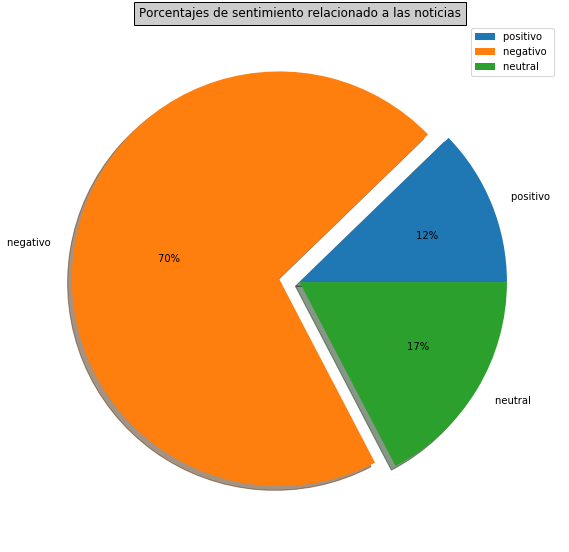

In [176]:
from pylab import *

figure(1, figsize=(8,8))
ax = axes([0, 0, 0.9, 0.9])
labels = 'positivo ', 'negativo ', 'neutral '
p=0
n=0
t=0

for i in range(len(noticias['sentimiento'])):
    if noticias['sentimiento'][i]<0:
        n+=1
    elif noticias['sentimiento'][i]>0:
        p+=1
    else:
        t+=1

x= p*100/len(noticias['sentimiento'])
y= n*100/len(noticias['sentimiento'])
z= t*100/len(noticias['sentimiento'])
               
fracs = [x,y,z]
                                                                                        
explode=(0, 0.1, 0)
                                                                                        
pie(fracs, explode=explode,labels=labels, autopct='%10.0f%%', shadow=True)
        
legend()

title('Porcentajes de sentimiento relacionado a las noticias', bbox={'facecolor':'0.8', 'pad':5})

show()

In [41]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

noticias['noticias_tokenized'] =  noticias['noticias_punct'].apply(lambda x: tokenization(x.lower()))
noticias.head(15)

fecha_string                fecha  \
0    2018-02-04  2018-02-04T15:47:00   
1    2018-02-12  2018-02-12T14:19:00   
2    2018-02-12  2018-02-12T18:10:00   
3    2018-02-12  2018-02-12T00:00:00   
4    2018-02-14  2018-02-14T00:00:00   
5    2018-04-09  2018-04-09T19:02:00   
6    2018-04-09  2018-04-09T17:26:00   
7    2018-04-09  2018-04-09T08:21:00   
8    2018-04-10  2018-04-10T00:00:00   
9    2018-04-10  2018-04-10T07:17:00   
10   2018-04-11  2018-04-11T17:39:00   
11   2018-04-13  2018-04-13T00:00:00   
12   2018-04-13  2018-04-13T18:11:00   
13   2018-04-13  2018-04-13T00:00:00   
14   2018-04-14  2018-04-14T16:50:00   

                                                  url  \
0   https://www.eluniverso.com/noticias/2018/12/04...   
1   https://www.eluniverso.com/noticias/2018/12/12...   
2   https://www.eluniverso.com/noticias/2018/12/12...   
3   https://www.eluniverso.com/noticias/2018/12/12...   
4   https://www.eluniverso.com/noticias/2018/12/13...   
5   https://www.eluniverso.com/noticias/2018/04/09...   
6   https://www.eluniverso.com/noticias/2018/04/09...   
7   https://www.eluniverso.com/entretenimiento/201...   
8   https://www.eluniverso.com/noticias/2018/04/10...   
9   https://www.eluniverso.com/noticias/2018/04/10...   
10  https://www.eluniverso.com/noticias/2018/04/11...   
11  https://www.eluniverso.com/noticias/2018/04/13...   
12  https://www.eluniverso.com/noticias/2018/04/13...   
13  https://www.eluniverso.com/noticias/2018/04/13...   
14  https://www.eluniverso.com/noticias/2018/04/14...   

                                               titulo  \
0   ONU quiere conseguir $ 738 millones para ayuda...   
1   Peinados por publicidad y otros cambios que ha...   
2   En OEA, Colombia pide tomar conciencia sobre m...   
3   Nicolás Maduro a embajadores: Si se quieren ir...   
4   Venezuela: Personas con VIH recurren a bebida ...   
5   Gobierno de Chile otorgará visa especial a ven...   
6   Destituida Corte Suprema de Venezuela pide des...   
7   Ricardo Montaner encabeza campaña de solidarid...   
8       El tema Venezuela sigue presente en la región   
9   España detiene a dos venezolanos por pedido de...   
10  España y Venezuela dispuestos a normalizar rel...   
11       Critican a tribunales militares de Venezuela   
12  Nicolás Maduro quiere elevar a un millón el nú...   
13  Venezuela, otro posible tema en las reuniones ...   
14  Estados Unidos pide más medidas para aislar al...   

                                                texto  categoria  \
0   Ginebra -Naciones Unidas dijo el martes que bu...   Economia   
1   Peinados a cambio de publicidad, un nuevo códi...   Economia   
2   Washington -Colombia pidió el miércoles a los ...   Politica   
3   El presidente de Venezuela, Nicolás Maduro, re...  Represion   
4   Caracas -Con cuidado, el hombre escoge las hoj...      Salud   
5   El gobierno de Sebastián Piñera anunció este l...   Sociedad   
6   El Tribunal Supremo de Justicia de Venezuela, ...   Politica   
7   El cantante Ricardo Montaner y la organización...   Sociedad   
8   El tema Venezuela sigue siendo frecuente entre...   Politica   
9   La Fiscalía General anunció que España apresó ...  Represion   
10  España y Venezuela mostraron su disposición a ...   Politica   
11  Los tribunales militares venezolanos están vio...   Politica   
12  El gobierno venezolano planea elevar a un mill...   Politica   
13  La crisis venezolana también estará “en el top...   Politica   
14  El vicepresidente de Estados Unidos, Mike Penc...   Politica   

   fecha_string.1  mes                                     noticias_punct  \
0      2018-02-04    2  Ginebra Naciones Unidas dijo el martes que bus...   
1      2018-02-12    2  Peinados a cambio de publicidad un nuevo códig...   
2      2018-02-12    2  Washington Colombia pidió el miércoles a los e...   
3      2018-02-12    2  El presidente de Venezuela Nicolás Maduro rest...   
4      2018-02-14    2  Caracas Con cuidado el hombre escoge l

In [45]:
stopword = nltk.corpus.stopwords.words('spanish')
stopword.extend(['Venezuela','Maduro','venezolano','venezolanos','venezonlanas'])
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
noticias['noticia_nonstop'] = noticias['noticias_tokenized'].apply(lambda x: remove_stopwords(x))
noticias.head(10)

fecha_string                fecha  \
0   2018-02-04  2018-02-04T15:47:00   
1   2018-02-12  2018-02-12T14:19:00   
2   2018-02-12  2018-02-12T18:10:00   
3   2018-02-12  2018-02-12T00:00:00   
4   2018-02-14  2018-02-14T00:00:00   
5   2018-04-09  2018-04-09T19:02:00   
6   2018-04-09  2018-04-09T17:26:00   
7   2018-04-09  2018-04-09T08:21:00   
8   2018-04-10  2018-04-10T00:00:00   
9   2018-04-10  2018-04-10T07:17:00   

                                                 url  \
0  https://www.eluniverso.com/noticias/2018/12/04...   
1  https://www.eluniverso.com/noticias/2018/12/12...   
2  https://www.eluniverso.com/noticias/2018/12/12...   
3  https://www.eluniverso.com/noticias/2018/12/12...   
4  https://www.eluniverso.com/noticias/2018/12/13...   
5  https://www.eluniverso.com/noticias/2018/04/09...   
6  https://www.eluniverso.com/noticias/2018/04/09...   
7  https://www.eluniverso.com/entretenimiento/201...   
8  https://www.eluniverso.com/noticias/2018/04/10...   
9  https://www.eluniverso.com/noticias/2018/04/10...   

                                              titulo  \
0  ONU quiere conseguir $ 738 millones para ayuda...   
1  Peinados por publicidad y otros cambios que ha...   
2  En OEA, Colombia pide tomar conciencia sobre m...   
3  Nicolás Maduro a embajadores: Si se quieren ir...   
4  Venezuela: Personas con VIH recurren a bebida ...   
5  Gobierno de Chile otorgará visa especial a ven...   
6  Destituida Corte Suprema de Venezuela pide des...   
7  Ricardo Montaner encabeza campaña de solidarid...   
8      El tema Venezuela sigue presente en la región   
9  España detiene a dos venezolanos por pedido de...   

                                               texto  categoria  \
0  Ginebra -Naciones Unidas dijo el martes que bu...   Economia   
1  Peinados a cambio de publicidad, un nuevo códi...   Economia   
2  Washington -Colombia pidió el miércoles a los ...   Politica   
3  El presidente de Venezuela, Nicolás Maduro, re...  Represion   
4  Caracas -Con cuidado, el hombre escoge las hoj...      Salud   
5  El gobierno de Sebastián Piñera anunció este l...   Sociedad   
6  El Tribunal Supremo de Justicia de Venezuela, ...   Politica   
7  El cantante Ricardo Montaner y la organización...   Sociedad   
8  El tema Venezuela sigue siendo frecuente entre...   Politica   
9  La Fiscalía General anunció que España apresó ...  Represion   

  fecha_string.1  mes                                     noticias_punct  \
0     2018-02-04    2  Ginebra Naciones Unidas dijo el martes que bus...   
1     2018-02-12    2  Peinados a cambio de publicidad un nuevo códig...   
2     2018-02-12    2  Washington Colombia pidió el miércoles a los e...   
3     2018-02-12    2  El presidente de Venezuela Nicolás Maduro rest...   
4     2018-02-14    2  Caracas Con cuidado el hombre escoge las hojas...   
5     2018-04-09    4  El gobierno de Sebastián Piñera anunció este l...   
6     2018-04-09    4  El Tribunal Supremo de Justicia de Venezuela c...   
7     2018-04-09    4  El cantante Ricardo Montaner y la organización...   
8     2018-04-10    4  El tema Venezuela sigue siendo frecuente entre...   
9     2018-04-10    4  La Fiscalía General anunció que España apresó ...   

   sentimiento                                 noticias_tokenized  \
0      -0.9766  [ginebra, naciones, unidas, dijo, el, martes, ...   
1      -0.8591  [peinados, a, cambio, de, publicidad, un, nuev...   
2      -0.9231  [washington, colombia, pidi, el, mi, rcoles, a...   
3       0.0000  [el, presidente, de, venezuela, nicol, s, madu...   
4       0.0000  [caracas, con, cuidado, el, hombre, escoge, la...   
5      -0.8957  [el, gobierno, de, sebasti, n, pi, era, anunci...   
6       0.5574  [el, tribunal, supremo, de, justicia, de, vene...   
7      -0.9118  [el, cantante, ricardo, montaner, y, la, organ...   
8      -0.9186  [el, tema, venezuela, sigue, siendo, frecuente...   
9      -0.2960  [la, fiscal, a, general, anunci, que, espa, a,...   

   

In [46]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

noticias['noticia_stemmed'] = noticias['noticia_nonstop'].apply(lambda x: stemming(x))
noticias.head(10)

fecha_string                fecha  \
0   2018-02-04  2018-02-04T15:47:00   
1   2018-02-12  2018-02-12T14:19:00   
2   2018-02-12  2018-02-12T18:10:00   
3   2018-02-12  2018-02-12T00:00:00   
4   2018-02-14  2018-02-14T00:00:00   
5   2018-04-09  2018-04-09T19:02:00   
6   2018-04-09  2018-04-09T17:26:00   
7   2018-04-09  2018-04-09T08:21:00   
8   2018-04-10  2018-04-10T00:00:00   
9   2018-04-10  2018-04-10T07:17:00   

                                                 url  \
0  https://www.eluniverso.com/noticias/2018/12/04...   
1  https://www.eluniverso.com/noticias/2018/12/12...   
2  https://www.eluniverso.com/noticias/2018/12/12...   
3  https://www.eluniverso.com/noticias/2018/12/12...   
4  https://www.eluniverso.com/noticias/2018/12/13...   
5  https://www.eluniverso.com/noticias/2018/04/09...   
6  https://www.eluniverso.com/noticias/2018/04/09...   
7  https://www.eluniverso.com/entretenimiento/201...   
8  https://www.eluniverso.com/noticias/2018/04/10...   
9  https://www.eluniverso.com/noticias/2018/04/10...   

                                              titulo  \
0  ONU quiere conseguir $ 738 millones para ayuda...   
1  Peinados por publicidad y otros cambios que ha...   
2  En OEA, Colombia pide tomar conciencia sobre m...   
3  Nicolás Maduro a embajadores: Si se quieren ir...   
4  Venezuela: Personas con VIH recurren a bebida ...   
5  Gobierno de Chile otorgará visa especial a ven...   
6  Destituida Corte Suprema de Venezuela pide des...   
7  Ricardo Montaner encabeza campaña de solidarid...   
8      El tema Venezuela sigue presente en la región   
9  España detiene a dos venezolanos por pedido de...   

                                               texto  categoria  \
0  Ginebra -Naciones Unidas dijo el martes que bu...   Economia   
1  Peinados a cambio de publicidad, un nuevo códi...   Economia   
2  Washington -Colombia pidió el miércoles a los ...   Politica   
3  El presidente de Venezuela, Nicolás Maduro, re...  Represion   
4  Caracas -Con cuidado, el hombre escoge las hoj...      Salud   
5  El gobierno de Sebastián Piñera anunció este l...   Sociedad   
6  El Tribunal Supremo de Justicia de Venezuela, ...   Politica   
7  El cantante Ricardo Montaner y la organización...   Sociedad   
8  El tema Venezuela sigue siendo frecuente entre...   Politica   
9  La Fiscalía General anunció que España apresó ...  Represion   

  fecha_string.1  mes                                     noticias_punct  \
0     2018-02-04    2  Ginebra Naciones Unidas dijo el martes que bus...   
1     2018-02-12    2  Peinados a cambio de publicidad un nuevo códig...   
2     2018-02-12    2  Washington Colombia pidió el miércoles a los e...   
3     2018-02-12    2  El presidente de Venezuela Nicolás Maduro rest...   
4     2018-02-14    2  Caracas Con cuidado el hombre escoge las hojas...   
5     2018-04-09    4  El gobierno de Sebastián Piñera anunció este l...   
6     2018-04-09    4  El Tribunal Supremo de Justicia de Venezuela c...   
7     2018-04-09    4  El cantante Ricardo Montaner y la organización...   
8     2018-04-10    4  El tema Venezuela sigue siendo frecuente entre...   
9     2018-04-10    4  La Fiscalía General anunció que España apresó ...   

   sentimiento                                 noticias_tokenized  \
0      -0.9766  [ginebra, naciones, unidas, dijo, el, martes, ...   
1      -0.8591  [peinados, a, cambio, de, publicidad, un, nuev...   
2      -0.9231  [washington, colombia, pidi, el, mi, rcoles, a...   
3       0.0000  [el, presidente, de, venezuela, nicol, s, madu...   
4       0.0000  [caracas, con, cuidado, el, hombre, escoge, la...   
5      -0.8957  [el, gobierno, de, sebasti, n, pi, era, anunci...   
6       0.5574  [el, tribunal, supremo, de, justicia, de, vene...   
7      -0.9118  [el, cantante, ricardo, montaner, y, la, organ...   
8      -0.9186  [el, tema, venezuela, sigue, siendo, frecuente...   
9      -0.2960  [la, fiscal, a, general, anunci, que, espa, a,...   

   

In [49]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text if "ja" not in word]
    return text

    
noticias['noticia_lemmatized'] = noticias['noticia_nonstop'].apply(lambda x: lemmatizer(x))
noticias.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


fecha_string                fecha  \
0   2018-02-04  2018-02-04T15:47:00   
1   2018-02-12  2018-02-12T14:19:00   
2   2018-02-12  2018-02-12T18:10:00   
3   2018-02-12  2018-02-12T00:00:00   
4   2018-02-14  2018-02-14T00:00:00   
5   2018-04-09  2018-04-09T19:02:00   
6   2018-04-09  2018-04-09T17:26:00   
7   2018-04-09  2018-04-09T08:21:00   
8   2018-04-10  2018-04-10T00:00:00   
9   2018-04-10  2018-04-10T07:17:00   

                                                 url  \
0  https://www.eluniverso.com/noticias/2018/12/04...   
1  https://www.eluniverso.com/noticias/2018/12/12...   
2  https://www.eluniverso.com/noticias/2018/12/12...   
3  https://www.eluniverso.com/noticias/2018/12/12...   
4  https://www.eluniverso.com/noticias/2018/12/13...   
5  https://www.eluniverso.com/noticias/2018/04/09...   
6  https://www.eluniverso.com/noticias/2018/04/09...   
7  https://www.eluniverso.com/entretenimiento/201...   
8  https://www.eluniverso.com/noticias/2018/04/10...   
9  https://www.eluniverso.com/noticias/2018/04/10...   

                                              titulo  \
0  ONU quiere conseguir $ 738 millones para ayuda...   
1  Peinados por publicidad y otros cambios que ha...   
2  En OEA, Colombia pide tomar conciencia sobre m...   
3  Nicolás Maduro a embajadores: Si se quieren ir...   
4  Venezuela: Personas con VIH recurren a bebida ...   
5  Gobierno de Chile otorgará visa especial a ven...   
6  Destituida Corte Suprema de Venezuela pide des...   
7  Ricardo Montaner encabeza campaña de solidarid...   
8      El tema Venezuela sigue presente en la región   
9  España detiene a dos venezolanos por pedido de...   

                                               texto  categoria  \
0  Ginebra -Naciones Unidas dijo el martes que bu...   Economia   
1  Peinados a cambio de publicidad, un nuevo códi...   Economia   
2  Washington -Colombia pidió el miércoles a los ...   Politica   
3  El presidente de Venezuela, Nicolás Maduro, re...  Represion   
4  Caracas -Con cuidado, el hombre escoge las hoj...      Salud   
5  El gobierno de Sebastián Piñera anunció este l...   Sociedad   
6  El Tribunal Supremo de Justicia de Venezuela, ...   Politica   
7  El cantante Ricardo Montaner y la organización...   Sociedad   
8  El tema Venezuela sigue siendo frecuente entre...   Politica   
9  La Fiscalía General anunció que España apresó ...  Represion   

  fecha_string.1  mes                                     noticias_punct  \
0     2018-02-04    2  Ginebra Naciones Unidas dijo el martes que bus...   
1     2018-02-12    2  Peinados a cambio de publicidad un nuevo códig...   
2     2018-02-12    2  Washington Colombia pidió el miércoles a los e...   
3     2018-02-12    2  El presidente de Venezuela Nicolás Maduro rest...   
4     2018-02-14    2  Caracas Con cuidado el hombre escoge las hojas...   
5     2018-04-09    4  El gobierno de Sebastián Piñera anunció este l...   
6     2018-04-09    4  El Tribunal Supremo de Justicia de Venezuela c...   
7     2018-04-09    4  El cantante Ricardo Montaner y la organización...   
8     2018-04-10    4  El tema Venezuela sigue siendo frecuente entre...   
9     2018-04-10    4  La Fiscalía General anunció que España apresó ...   

   sentimiento                                 noticias_tokenized  \
0      -0.9766  [ginebra, naciones, unidas, dijo, el, martes, ...   
1      -0.8591  [peinados, a, cambio, de, publicidad, un, nuev...   
2      -0.9231  [washington, colombia, pidi, el, mi, rcoles, a...   
3       0.0000  [el, presidente, de, venezuela, nicol, s, madu...   
4       0.0000  [caracas, con, cuidado, el, hombre, escoge, la...   
5      -0.8957  [el, gobierno, de, sebasti, n, pi, era, anunci...   
6       0.5574  [el, tribunal, supremo, de, justicia, de, vene...   
7      -0.9118  [el, cantante, ricardo, montaner, y, la, organ...   
8      -0.9186  [el, tema, venezuela, sigue, siendo, frecuente...   
9      -0.2960  [la, fiscal, a, general, anunci, que, espa, a,...   

   

In [51]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(noticias['stemmed'])
print('{} Número de noticias tienen {} words'.format(countVector.shape[0], countVector.shape[1]))

313 Número de noticias tienen 6458 words


In [52]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

aban  abandonado  abandonan  abandonar  abandonara  abandonaron  abarca  \
0  0     0           0          0          0           0            0       0   
1  0     0           0          0          0           0            0       0   
2  0     0           1          0          0           0            0       0   
3  0     0           0          0          0           0            0       0   
4  0     0           0          0          0           0            0       0   

   abarcan  abarrotado   ...    zelaya  zhou  zimbabu  zimbabuens  zimbabw  \
0        0           0   ...         0     0        0           0        0   
1        0           0   ...         0     0        0           0        0   
2        0           0   ...         0     0        0           0        0   
3        0           0   ...         0     0        0           0        0   
4        0           0   ...         0     0        0           0        0   

   zona  zonal  zulia  zuliano  zumano  
0     0      0      0        0       0  
1     0      0      0        0       0  
2     1      0      0        0       0  
3     0      0      0        0       0  
4     0      0      0        0       0  

[5 rows x 6458 columns]

In [244]:
corpus=[]
text=[]
for i in range(len(noticias['noticia_lemmatized'])):
    text= ' '.join(noticias['noticia_lemmatized'][i])
    print(text)
    corpus.append(text)

ginebra naciones unidas martes busca obtener millones lares ayudar vecinos lidiar flujo millones refugiados migrantes procedentes naci perspectivas retorno corto mediano plazofue primera vez crisis incluy llamamiento humanitario global onu asciende millones lares entrante incluir siriatres millones huido crisis pol econ mica sufre naci opep mayor agencia refugiados onu acnurhay crisis primera vez plan respuesta ayudar vecinos lidiar consecuencias grandes meros mark lowcock titular oficina naciones unidas coordinaci asuntos humanitarios ochael anuncio realiz conferencia prensa ginebra onu lanz solicitud fondos lidiar crisis humanitarias nivel global
peinados cambio publicidad nuevo digo miss celebrar jueves edici busca reinventarse sortear estragos crisis econ mica sepultar esc ndalos supuesto proxenetismo abrirse participaci transexualesla opulencia cosa pasado concurso salido siete miss universo seis miss mundo hacerse poliedro caracas aforo persona estudio televisora due derechos ven

nuevas medidas gobierno presidente nicol solo empeorar vida escribi ayer twitter vicepresidente unidos mike penny pidi gobierno chavista tilda tiran permitir llegue ayuda internacional penny mencion petrolero ruina culpa gobierno fondo monetario internacional inflaci podr alcanzar asombroso solamente nicol gimen llevado alguna vez pr spero ruina econ mica crisis humanitaria indic mero gobierno estadounidense penny expres opini tuits comentar editorial diario estadounidense the wall street journal lleva t tulo caos monetario caracas apareci ayer edici impresa ala nica manera frenar ca da econom dolarizar i
organizaci americanos oea onu lanzaron ayer propuestas abordar ola migratoria afecta luis almagro secretario general oea solicit consejo permanente organismo reuni urgente objetivo tratar crisis migratoria representante solicit realice lapso semanas objetivo ayudar huyen crisis regi vez enfatiz reciben inmigrantes hecho esfuerzo debe reconocido apoyado organismo onu pidi respeten dere

In [245]:
# remove common words and tokenize
list1 = ['Venezuela','Maduro','venezolano','venezolanos','venezonlanas','venezolana','maduro','an','bol','c','d','dijo','do','est','s','seg','tambi','tras','venezuela','cada','agreg','cr','n','m','p','l','r','tica','rica','ser']
stoplist = stopwords.words('spanish') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
#print(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)
from gensim import corpora, models, similarities
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus] 

In [249]:
total_topics = 3
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] 
lda.show_topics(total_topics,5)
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
df_lda

(34, 3)
(3, 34)


anunci  canciller   caracas     chile  colombia    crisis      econ  \
0  0.000000   0.002267  0.003428  0.000000  0.003742  0.007263  0.003936   
1  0.000000   0.001890  0.003051  0.001824  0.004331  0.004006  0.003401   
2  0.001814   0.000000  0.003661  0.000000  0.002604  0.004453  0.002931   

    ecuador  gobierno     grupo    ...        parte    pasado  pasaporte  \
0  0.006115  0.007361  0.000000    ...     0.001919  0.001945   0.002084   
1  0.003476  0.006064  0.001796    ...     0.000000  0.002225   0.000000   
2  0.002416  0.007237  0.001667    ...     0.002105  0.000000   0.001879   

        per   persona       pol        pr  presidente    unidos       vez  
0  0.003333  0.002005  0.003376  0.000000    0.004810  0.001973  0.000000  
1  0.003974  0.002286  0.002377  0.000000    0.006487  0.001836  0.000000  
2  0.002326  0.002537  0.001915  0.001901    0.005854  0.001801  0.001943  

[3 rows x 34 columns]

----------------Cluster map de correlaciones cruzadas entre el top 50 de palabras--------------


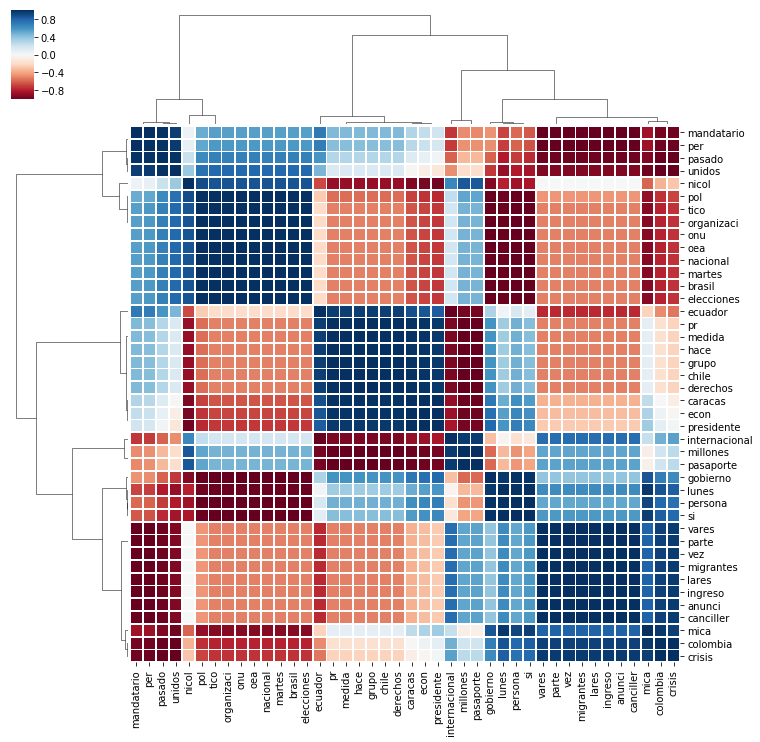

In [247]:
print('----------------Cluster map de correlaciones cruzadas entre el top 50 de palabras--------------')
cm=sb.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [99]:
df_lda.columns.values.tolist()

[u'anunci',
 u'asamblea',
 u'ayer',
 u'brasil',
 u'canciller',
 u'caracas',
 u'chile',
 u'colombia',
 u'crisis',
 u'derechos',
 u'despu',
 u'domingo',
 u'econ',
 u'ecuador',
 u'elecciones',
 u'gobierno',
 u'hace',
 u'humanitaria',
 u'ingreso',
 u'internacional',
 u'lares',
 u'lima',
 u'lunes',
 u'mandatario',
 u'martes',
 u'mayor',
 u'medida',
 u'medidas',
 u'medio',
 u'mica',
 u'mientras',
 u'migrantes',
 u'migratoria',
 u'millones',
 u'nacional',
 u'nicol',
 u'onu',
 u'organizaci',
 u'pa',
 u'parte',
 u'pasado',
 u'pasaporte',
 u'per',
 u'persona',
 u'pol',
 u'presidente',
 u'rcoles',
 u'sanciones',
 u'si',
 u'situaci',
 u'tico',
 u'tres',
 u'unidos',
 u'vares',
 u'vez']

In [149]:
##verificar data completa
noticias.count()

fecha_string          313
fecha                 313
url                   313
titulo                313
texto                 313
categoria             313
fecha_string.1        313
mes                   313
noticias_punct        313
sentimiento           313
noticias_tokenized    313
noticia_nonstop       313
noticia_stemmed       313
noticia_lemmatized    313
noticia_limpia        313
dtype: int64

In [148]:
##revomer palabras que resultan sin significado aun después de todo el proceso anterior
lista_adicional = ['Venezuela','Maduro','venezolano','venezolanos','venezonlanas','venezolana','maduro','an','bol','c','d','dijo','do','est','s','seg','tambi','tras','venezuela','cada','agreg','cr','n','m','p','l','r','tica','rica','ser']

def remover(x,e):
    r = []
    if e in x:
        r = x.remove(e)
        return r
    else:
        return x

for elemento in lista_adicional:
        noticias['noticia_limpia'] = noticias['noticia_lemmatized'].apply(lambda x:remover(x,elemento))
noticias.head(10)

fecha_string                fecha  \
0   2018-02-04  2018-02-04T15:47:00   
1   2018-02-12  2018-02-12T14:19:00   
2   2018-02-12  2018-02-12T18:10:00   
3   2018-02-12  2018-02-12T00:00:00   
4   2018-02-14  2018-02-14T00:00:00   
5   2018-04-09  2018-04-09T19:02:00   
6   2018-04-09  2018-04-09T17:26:00   
7   2018-04-09  2018-04-09T08:21:00   
8   2018-04-10  2018-04-10T00:00:00   
9   2018-04-10  2018-04-10T07:17:00   

                                                 url  \
0  https://www.eluniverso.com/noticias/2018/12/04...   
1  https://www.eluniverso.com/noticias/2018/12/12...   
2  https://www.eluniverso.com/noticias/2018/12/12...   
3  https://www.eluniverso.com/noticias/2018/12/12...   
4  https://www.eluniverso.com/noticias/2018/12/13...   
5  https://www.eluniverso.com/noticias/2018/04/09...   
6  https://www.eluniverso.com/noticias/2018/04/09...   
7  https://www.eluniverso.com/entretenimiento/201...   
8  https://www.eluniverso.com/noticias/2018/04/10...   
9  https://www.eluniverso.com/noticias/2018/04/10...   

                                              titulo  \
0  ONU quiere conseguir $ 738 millones para ayuda...   
1  Peinados por publicidad y otros cambios que ha...   
2  En OEA, Colombia pide tomar conciencia sobre m...   
3  Nicolás Maduro a embajadores: Si se quieren ir...   
4  Venezuela: Personas con VIH recurren a bebida ...   
5  Gobierno de Chile otorgará visa especial a ven...   
6  Destituida Corte Suprema de Venezuela pide des...   
7  Ricardo Montaner encabeza campaña de solidarid...   
8      El tema Venezuela sigue presente en la región   
9  España detiene a dos venezolanos por pedido de...   

                                               texto  categoria  \
0  Ginebra -Naciones Unidas dijo el martes que bu...   Economia   
1  Peinados a cambio de publicidad, un nuevo códi...   Economia   
2  Washington -Colombia pidió el miércoles a los ...   Politica   
3  El presidente de Venezuela, Nicolás Maduro, re...  Represion   
4  Caracas -Con cuidado, el hombre escoge las hoj...      Salud   
5  El gobierno de Sebastián Piñera anunció este l...   Sociedad   
6  El Tribunal Supremo de Justicia de Venezuela, ...   Politica   
7  El cantante Ricardo Montaner y la organización...   Sociedad   
8  El tema Venezuela sigue siendo frecuente entre...   Politica   
9  La Fiscalía General anunció que España apresó ...  Represion   

  fecha_string.1  mes                                     noticias_punct  \
0     2018-02-04    2  Ginebra Naciones Unidas dijo el martes que bus...   
1     2018-02-12    2  Peinados a cambio de publicidad un nuevo códig...   
2     2018-02-12    2  Washington Colombia pidió el miércoles a los e...   
3     2018-02-12    2  El presidente de Venezuela Nicolás Maduro rest...   
4     2018-02-14    2  Caracas Con cuidado el hombre escoge las hojas...   
5     2018-04-09    4  El gobierno de Sebastián Piñera anunció este l...   
6     2018-04-09    4  El Tribunal Supremo de Justicia de Venezuela c...   
7     2018-04-09    4  El cantante Ricardo Montaner y la organización...   
8     2018-04-10    4  El tema Venezuela sigue siendo frecuente entre...   
9     2018-04-10    4  La Fiscalía General anunció que España apresó ...   

   sentimiento                                 noticias_tokenized  \
0      -0.9766  [ginebra, naciones, unidas, dijo, el, martes, ...   
1      -0.8591  [peinados, a, cambio, de, publicidad, un, nuev...   
2      -0.9231  [washington, colombia, pidi, el, mi, rcoles, a...   
3       0.0000  [el, presidente, de, venezuela, nicol, s, madu...   
4       0.0000  [caracas, con, cuidado, el, hombre, escoge, la...   
5      -0.8957  [el, gobierno, de, sebasti, n, pi, era, anunci...   
6       0.5574  [el, tribunal, supremo, de, justicia, de, vene...   
7      -0.9118  [el, cantante, ricardo, montaner, y, la, organ...   
8      -0.9186  [el, tema, venezuela, sigue, siendo, frecuente...   
9      -0.2960  [la, fiscal, a, general, anunci, que, espa, a,...   

   

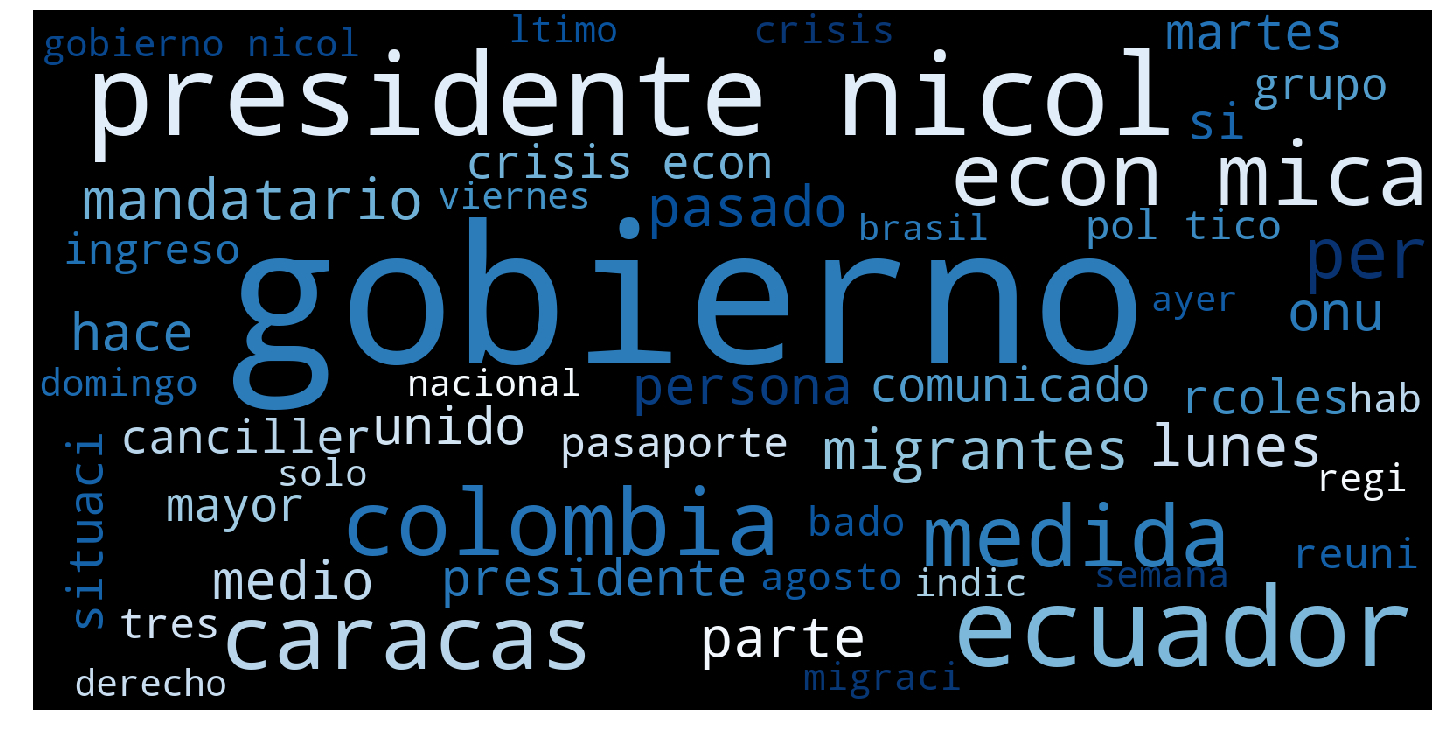

In [150]:
all_words = noticias['noticia_limpia'].tolist()
cleaned_words = []
for i in all_words:
    for j in i:
            cleaned_words.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_words_series = pd.Series(cleaned_words)
words_counts = cleaned_words_series.value_counts()
hashes = cleaned_words_series.values
hashes = hashes.tolist()

# convert list to one string with all the words
hashes_words = " ".join(hashes)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 50).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [158]:
lista = hashes
lista = np.array(lista)
lista = lista[lista != ""]
lista = list(lista)
print(lista)

[u'ginebra', u'naciones', u'unidas', u'martes', u'busca', u'obtener', u'millones', u'lares', u'ayudar', u'vecinos', u'lidiar', u'flujo', u'millones', u'refugiados', u'migrantes', u'procedentes', u'naci', u'perspectivas', u'retorno', u'corto', u'mediano', u'plazofue', u'primera', u'vez', u'crisis', u'incluy', u'llamamiento', u'humanitario', u'global', u'onu', u'asciende', u'millones', u'lares', u'entrante', u'incluir', u'siriatres', u'millones', u'huido', u'crisis', u'pol', u'econ', u'mica', u'sufre', u'naci', u'opep', u'mayor', u'agencia', u'refugiados', u'onu', u'acnurhay', u'crisis', u'primera', u'vez', u'plan', u'respuesta', u'ayudar', u'vecinos', u'lidiar', u'consecuencias', u'grandes', u'meros', u'mark', u'lowcock', u'titular', u'oficina', u'naciones', u'unidas', u'coordinaci', u'asuntos', u'humanitarios', u'ochael', u'anuncio', u'realiz', u'conferencia', u'prensa', u'ginebra', u'onu', u'lanz', u'solicitud', u'fondos', u'lidiar', u'crisis', u'humanitarias', u'nivel', u'global', u'

In [250]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics            x           y
topic                                                     
0      63.257832        1       1  -632.045471 -384.325073
1      18.466524        1       2 -1209.665405  212.164124
2      18.275642        1       3 -1437.453247 -586.322510, topic_info=     Category      Freq           Term     Total  loglift  logprob
term                                                              
1274  Default  1.000000     presidente  1.000000  30.0000  30.0000
280   Default  2.000000       gobierno  2.000000  29.0000  29.0000
6443  Default  1.000000          nicol  1.000000  28.0000  28.0000
6327  Default  1.000000       colombia  1.000000  27.0000  27.0000
440   Default  1.000000            per  1.000000  26.0000  26.0000
1332  Default  1.000000        caracas  1.000000  25.0000  25.0000
2441  Default  0.000000  internacional  0.000000  24.0000  24.0000
6055  Default  0.000000        persona  0.000000  23.0000  23.0000
3196  Default  1.000000           econ  1.000000  22.0000  22.0000
851   Default  0.000000           mica  0.000000  21.0000  21.0000
6436  Default  0.000000             pr  0.000000  20.0000  20.0000
1689  Default  0.000000       nacional  0.000000  19.0000  19.0000
5305  Default  0.000000       millones  0.000000  18.0000  18.0000
4681  Default  0.000000    humanitaria  0.000000  17.0000  17.0000
1879  Default  0.000000        medidas  0.000000  16.0000  16.0000
5978  Default  0.000000           hace  0.000000  15.0000  15.0000
5809  Default  1.000000         crisis  1.000000  14.0000  14.0000
6148  Default  0.000000          grupo  0.000000  13.0000  13.0000
181   Default  0.000000         rcoles  0.000000  12.0000  12.0000
5875  Default  0.000000         anunci  0.000000  11.0000  11.0000
2853  Default  0.000000         pasado  0.000000  10.0000  10.0000
2970  Default  0.000000    autoridades  0.000000   9.0000   9.0000
3926  Default  0.000000          lunes  0.000000   8.0000   8.0000
2532  Default  0.000000          medio  0.000000   7.0000   7.0000
281   Default  0.000000          chile  0.000000   6.0000   6.0000
3457  Default  0.000000          parte  0.000000   5.0000   5.0000
6699  Default  0.000000        situaci  0.000000   4.0000   4.0000
448   Default  0.000000            vez  0.000000   3.0000   3.0000
4909  Default  0.000000      militares  0.000000   2.0000   2.0000
2988  Default  0.000000       frontera  0.000000   1.0000   1.0000
...       ...       ...            ...       ...      ...      ...
5352   Topic3  0.063659         fuerza  0.227984   0.4239  -6.8008
5413   Topic3  0.039770          peque  0.122400   0.5754  -7.2712
1689   Topic3  0.108294       nacional  0.476872   0.2172  -6.2695
6141   Topic3  0.069209   funcionarios  0.261445   0.3705  -6.7172
2034   Topic3  0.075257        viernes  0.296115   0.3298  -6.6334
448    Topic3  0.111161            vez  0.517711   0.1612  -6.2434
3457   Topic3  0.120406          parte  0.584395   0.1199  -6.1635
2441   Topic3  0.135218  internacional  0.702327   0.0521  -6.0475
5875   Topic3  0.103775         anunci  0.480515   0.1670  -6.3121
336    Topic3  0.080967            hab  0.339974   0.2648  -6.5603
5809   Topic3  0.254722         crisis  1.924219  -0.3225  -5.4142
176    Topic3  0.060755         diario  0.224106   0.3943  -6.8475
3196   Topic3  0.167679           econ  1.143495  -0.2202  -5.8323
6148   Topic3  0.095385          grupo  0.475865   0.0924  -6.3964
5978   Topic3  0.095769           hace  0.493346   0.0603  -6.3924
5161   Topic3  0.107501      pasaporte  0.605235  -0.0285  -6.2769
851    Topic3  0.133586           mica  0.900238  -0.2083  -6.0596
283    Topic3  0.089256         medida  0.444081   0.0951  -6.4629
6327   Topic3  0.148979       colombia  1.140242  -0.3356  -5.9506
440    Topic3  0.133062            per  1.022604  -0.3397  -6.0635
2451   Topic3  0.103012         unidos  0.599665  -0.0619  -6.3195
2877   Topic3  0.084824          vares  0.41

In [163]:
noticias.head(20)

fecha_string                fecha  \
0    2018-02-04  2018-02-04T15:47:00   
1    2018-02-12  2018-02-12T14:19:00   
2    2018-02-12  2018-02-12T18:10:00   
3    2018-02-12  2018-02-12T00:00:00   
4    2018-02-14  2018-02-14T00:00:00   
5    2018-04-09  2018-04-09T19:02:00   
6    2018-04-09  2018-04-09T17:26:00   
7    2018-04-09  2018-04-09T08:21:00   
8    2018-04-10  2018-04-10T00:00:00   
9    2018-04-10  2018-04-10T07:17:00   
10   2018-04-11  2018-04-11T17:39:00   
11   2018-04-13  2018-04-13T00:00:00   
12   2018-04-13  2018-04-13T18:11:00   
13   2018-04-13  2018-04-13T00:00:00   
14   2018-04-14  2018-04-14T16:50:00   
15   2018-04-14  2018-04-14T16:03:00   
16   2018-04-15  2018-04-15T14:21:00   
17   2018-04-16  2018-04-16T20:43:00   
18   2018-04-18  2018-04-18T22:38:00   
19   2018-04-19  2018-04-19T07:58:00   

                                                  url  \
0   https://www.eluniverso.com/noticias/2018/12/04...   
1   https://www.eluniverso.com/noticias/2018/12/12...   
2   https://www.eluniverso.com/noticias/2018/12/12...   
3   https://www.eluniverso.com/noticias/2018/12/12...   
4   https://www.eluniverso.com/noticias/2018/12/13...   
5   https://www.eluniverso.com/noticias/2018/04/09...   
6   https://www.eluniverso.com/noticias/2018/04/09...   
7   https://www.eluniverso.com/entretenimiento/201...   
8   https://www.eluniverso.com/noticias/2018/04/10...   
9   https://www.eluniverso.com/noticias/2018/04/10...   
10  https://www.eluniverso.com/noticias/2018/04/11...   
11  https://www.eluniverso.com/noticias/2018/04/13...   
12  https://www.eluniverso.com/noticias/2018/04/13...   
13  https://www.eluniverso.com/noticias/2018/04/13...   
14  https://www.eluniverso.com/noticias/2018/04/14...   
15  https://www.eluniverso.com/noticias/2018/04/14...   
16  https://www.eluniverso.com/noticias/2018/04/15...   
17  https://www.eluniverso.com/noticias/2018/04/16...   
18  https://www.eluniverso.com/noticias/2018/04/18...   
19  https://www.eluniverso.com/noticias/2018/04/19...   

                                               titulo  \
0   ONU quiere conseguir $ 738 millones para ayuda...   
1   Peinados por publicidad y otros cambios que ha...   
2   En OEA, Colombia pide tomar conciencia sobre m...   
3   Nicolás Maduro a embajadores: Si se quieren ir...   
4   Venezuela: Personas con VIH recurren a bebida ...   
5   Gobierno de Chile otorgará visa especial a ven...   
6   Destituida Corte Suprema de Venezuela pide des...   
7   Ricardo Montaner encabeza campaña de solidarid...   
8       El tema Venezuela sigue presente en la región   
9   España detiene a dos venezolanos por pedido de...   
10  España y Venezuela dispuestos a normalizar rel...   
11       Critican a tribunales militares de Venezuela   
12  Nicolás Maduro quiere elevar a un millón el nú...   
13  Venezuela, otro posible tema en las reuniones ...   
14  Estados Unidos pide más medidas para aislar al...   
15  En Cumbre de las Américas, Ecuador exhorta a d...   
16  Nicolás Maduro recibe apoyo de Evo Morales de ...   
17  Venezolanos abarrotaron consulado chileno en C...   
18  Nicolás Maduro espera restaurar la relación co...   
19  España y Venezuela acuerdan restaurar relacion...   

                                                texto  categoria  \
0   Ginebra -Naciones Unidas dijo el martes que bu...   Economia   
1   Peinados a cambio de publicidad, un nuevo códi...   Economia   
2   Washington -Colombia pidió el miércoles a los ...   Politica   
3   El presidente de Venezuela, Nicolás Maduro, re...  Represion   
4   Caracas -Con cuidado, el hombre escoge las hoj...      Salud   
5   El gobierno de Sebastián Piñera anunció este l...   Sociedad   
6   El Tribunal Supremo de Justicia de Venezuela, ...   Politica   
7   El cantante Ricardo Montaner y la organización...   Sociedad   
8   El tema Venezuela sigue siendo frecuente entre...   Politica   
9   La Fiscalía General anunció que España apresó ...  Represion   
10  España y Venez

In [170]:
noticias.to_csv('noticias_Venezuela_textoLimpio.csv')

# CLASIFICACION POR CATEGORIA

In [232]:
#Variar hiperparámetro cantidad de tópicos totales
total_topics = 3

## ECONOMIA

In [230]:
corpusEcon=[]
text=[]
for i in range(len(noticias['noticia_lemmatized'])):
    if noticias['categoria'][i]=='Economia':
        text= ' '.join(noticias['noticia_lemmatized'][i])
        print(text)
        corpusEcon.append(text)

ginebra naciones unidas martes busca obtener millones lares ayudar vecinos lidiar flujo millones refugiados migrantes procedentes naci perspectivas retorno corto mediano plazofue primera vez crisis incluy llamamiento humanitario global onu asciende millones lares entrante incluir siriatres millones huido crisis pol econ mica sufre naci opep mayor agencia refugiados onu acnurhay crisis primera vez plan respuesta ayudar vecinos lidiar consecuencias grandes meros mark lowcock titular oficina naciones unidas coordinaci asuntos humanitarios ochael anuncio realiz conferencia prensa ginebra onu lanz solicitud fondos lidiar crisis humanitarias nivel global
peinados cambio publicidad nuevo digo miss celebrar jueves edici busca reinventarse sortear estragos crisis econ mica sepultar esc ndalos supuesto proxenetismo abrirse participaci transexualesla opulencia cosa pasado concurso salido siete miss universo seis miss mundo hacerse poliedro caracas aforo persona estudio televisora due derechos ven

In [233]:
# remove common words and tokenize
list1 = ['Venezuela','Maduro','venezolano','venezolanos','venezonlanas','venezolana','maduro','an','bol','c','d','dijo','do','est','s','seg','tambi','tras','venezuela','cada','agreg','cr','n','m','p','l','r','tica','rica','ser']
stoplist1 = stopwords.words('spanish') + list(punctuation) + list1

textsEcon = [[word for word in str(document).lower().split() if word not in stoplist1] for document in corpusEcon]
dictionaryEcon = corpora.Dictionary(textsEcon)
dictionaryEcon.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
#print(dictionary)
corpusE = [dictionaryEcon.doc2bow(text) for text in textsEcon]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpusE)
from gensim import corpora, models, similarities
tfidf_E = models.TfidfModel(corpusE)
corpus_tfidf_E = tfidf[corpusE] 

In [234]:
ldaE = models.LdaModel(corpusE, id2word=dictionaryEcon, num_topics=total_topics)
corpus_lda_E = ldaE[corpus_tfidf] 
ldaE.show_topics(total_topics,5)
from collections import OrderedDict

data_lda_E = {i: OrderedDict(ldaE.show_topic(i,25)) for i in range(total_topics)}
df_lda_E = pd.DataFrame(data_lda_E)
print(df_lda_E.shape)
df_lda_E = df_lda_E.fillna(0).T
print(df_lda_E.shape)
df_lda_E

(47, 3)
(3, 47)


agosto    anunci    banco  billetes     busca    cambio   caracas  \
0  0.000000  0.002509  0.00000  0.000000  0.000000  0.000000  0.004327   
1  0.002827  0.004976  0.00000  0.000000  0.003085  0.002803  0.006237   
2  0.000000  0.002904  0.00217  0.002384  0.002781  0.002487  0.003844   

      china    ciento  colombia    ...         petr  petrolera      plan  \
0  0.004824  0.000000  0.000000    ...     0.003003   0.003867  0.000000   
1  0.000000  0.000000  0.004786    ...     0.000000   0.000000  0.000000   
2  0.000000  0.003437  0.000000    ...     0.000000   0.000000  0.002967   

         pr   precios  presidente   salario  soberanos       var     vares  
0  0.000000  0.003439    0.006207  0.000000   0.000000  0.003254  0.009055  
1  0.003582  0.003731    0.006702  0.000000   0.000000  0.000000  0.003079  
2  0.002513  0.000000    0.005967  0.002274   0.002268  0.000000  0.004618  

[3 rows x 47 columns]

---------Cluster map de correlaciones cruzadas entre el top 50 de palabras para ECONOMIA--------


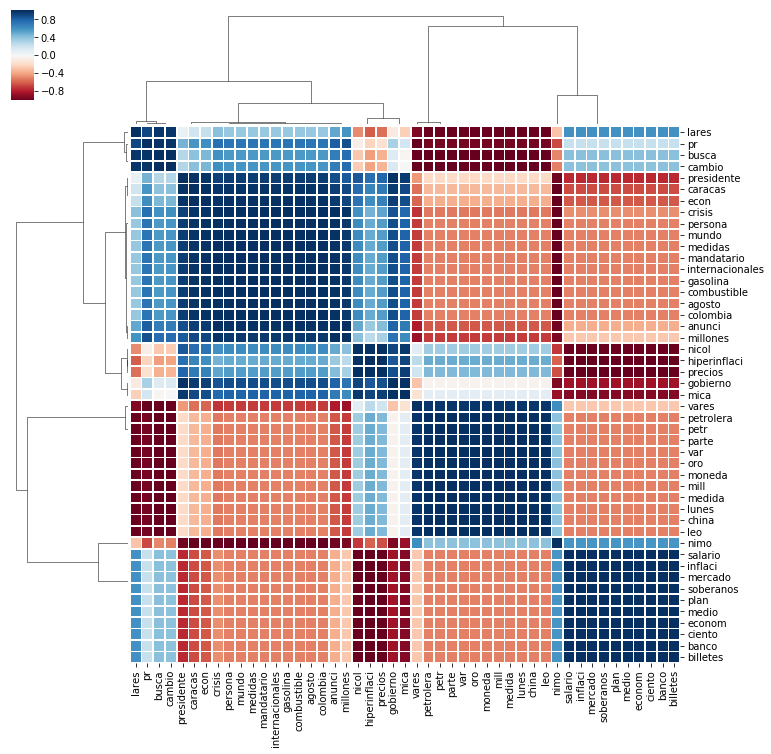

In [235]:
print('---------Cluster map de correlaciones cruzadas entre el top 50 de palabras para ECONOMIA--------')
cmE=sb.clustermap(df_lda_E.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(cmE.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [186]:
noticias_Economia = noticias[noticias['categoria']=='Economia']
noticias_Economia

fecha_string                fecha  \
0     2018-02-04  2018-02-04T15:47:00   
1     2018-02-12  2018-02-12T14:19:00   
20    2018-04-19  2018-04-19T00:00:00   
32    2018-04-24  2018-04-24T00:00:00   
34    2018-04-25  2018-04-25T00:00:00   
39    2018-04-30  2018-04-30T14:19:00   
40    2018-05-02  2018-05-02T00:00:00   
45    2018-05-14  2018-05-14T13:06:00   
47    2018-05-15  2018-05-15T14:06:00   
48    2018-05-15  2018-05-15T08:43:00   
50    2018-05-16  2018-05-16T00:00:00   
66    2018-05-21  2018-05-21T17:34:00   
74    2018-05-26  2018-05-26T00:00:00   
81    2018-06-02  2018-06-02T16:46:00   
96    2018-06-11  2018-06-11T16:01:00   
104   2018-06-20  2018-06-20T20:28:00   
125   2018-07-22  2018-07-22T15:44:00   
126   2018-07-23  2018-07-23T16:23:00   
129   2018-07-25  2018-07-25T19:20:00   
130   2018-07-26  2018-07-26T00:00:00   
132   2018-07-29  2018-07-29T09:50:00   
135   2018-07-31  2018-07-31T17:52:00   
136   2018-08-02  2018-08-02T20:06:00   
155   2018-08-15  2018-08-15T21:32:00   
156   2018-08-15  2018-08-15T00:00:00   
163   2018-08-17  2018-08-17T00:00:92   
165   2018-08-18  2018-08-18T00:00:92   
168   2018-08-18  2018-08-18T00:00:92   
174   2018-08-20  2018-08-20T00:00:92   
176   2018-08-20  2018-08-20T00:00:92   
178   2018-08-20  2018-08-20T00:00:92   
187   2018-08-21  2018-08-21T00:00:92   
190   2018-08-21  2018-08-21T00:00:92   
194   2018-08-22  2018-08-22T00:00:52   
204   2018-08-26  2018-08-26T00:00:52   
209   2018-08-27  2018-08-27T00:00:52   
215   2018-08-28  2018-08-28T00:00:52   
226   2018-08-31  2018-08-31T00:00:52   
228   2018-08-31  2018-08-31T00:00:52   
229   2018-08-31  2018-08-31T00:00:52   
231   2018-08-31  2018-08-31T00:00:52   
233   2018-09-03  2018-09-03T00:00:28   
240   2018-09-10  2018-09-10T00:00:28   
244   2018-09-13  2018-09-13T00:00:28   
246   2018-09-14  2018-09-14T00:00:28   
248   2018-09-15  2018-09-15T00:00:28   
257   2018-09-23  2018-09-23T00:00:12   
262   2018-09-26  2018-09-26T00:00:12   
265   2018-09-26  2018-09-26T00:00:12   
274   2018-10-01  2018-10-01T00:00:09   
279   2018-10-06  2018-10-06T00:00:04   
283   2018-10-21  2018-10-21T00:00:00   
294   2018-11-13  2018-11-13T00:00:00   
297   2018-11-20  2018-11-20T00:00:00   
306   2018-11-30  2018-11-30T00:00:00   
308   2018-12-04  2018-12-04T15:47:00   
311   2018-12-12  2018-12-12T14:19:00   

                                                   url  \
0    https://www.eluniverso.com/noticias/2018/12/04...   
1    https://www.eluniverso.com/noticias/2018/12/12...   
20   https://www.eluniverso.com/noticias/2018/04/19...   
32   https://www.eluniverso.com/noticias/2018/04/24...   
34   https://www.eluniverso.com/noticias/2018/04/25...   
39   https://www.eluniverso.com/noticias/2018/04/30...   
40   https://www.eluniverso.com/noticias/2018/05/02...   
45   https://www.eluniverso.com/noticias/2018/05/14...   
47   https://www.eluniverso.com/noticias/2018/05/15...   
48   https://www.eluniverso.com/noticias/2018/05/15...   
50   https://www.eluniverso.com/noticias/2018/05/16...   
66   https://www.eluniverso.com/noticias/2018/05/21...   
74   https://www.eluniverso.com/noticias/2018/05/22...   
81   https://www.eluniverso.com/noticias/2018/06/02...   
96   https://www.eluniverso.com/noticias/2018/06/11...   
104  https://www.eluniverso.com/noticias/2018/06/20...   
125  https://www.eluniverso.com/noticias/nota/68723...   
126  https://www.eluniverso.com/noticias/nota/68738...   
129  https://www.eluniverso.com/noticias/nota/68770...   
130  https://www.eluniverso.com/noticias/2018/07/27...   
132  https://www.eluniverso.com/noticias/nota/68819...   
135  https://www.eluniverso.com/noticias/nota/68846...   
136  https://www.eluniverso.com/noticias/nota/68878...   
155  https://www.eluniverso.com/noticias/2018/08/13...   
156  https://www.eluniverso.com/noticias/2018/08/15...   
163  https://www.eluniverso.com/noticias/2018/08/17...   
165  https://www.eluniverso.com/noticias/2018/08/18...   
1

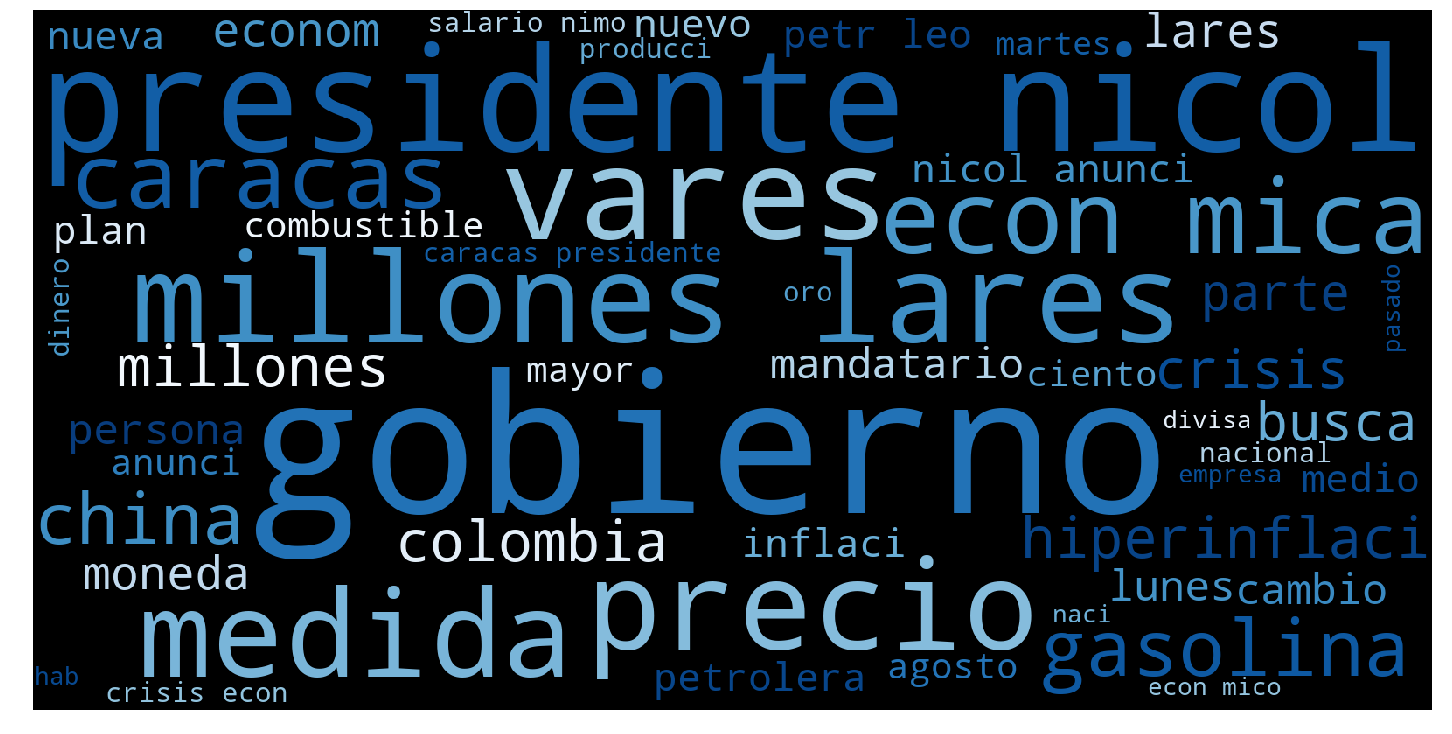

In [236]:
all_words_Econ = noticias_Economia['noticia_limpia'].tolist()
cleaned_words_E = []
for i in all_words_Econ:
    for j in i:
            cleaned_words_E.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_words_series_E = pd.Series(cleaned_words_E)
words_counts_E = cleaned_words_series_E.value_counts()
hashes_E = cleaned_words_series_E.values
hashes_E = hashes_E.tolist()

# convert list to one string with all the words
hashes_words_E = " ".join(hashes_E)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
from wordcloud import WordCloud
wordcloud_E = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 50).generate(hashes_words_E)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud_E)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [237]:
lista_E = hashes_E
lista_E = np.array(lista_E)
lista_E = lista_E[lista_E != ""]
lista_E = list(lista_E)
print(lista_E)

[u'ginebra', u'naciones', u'unidas', u'martes', u'busca', u'obtener', u'millones', u'lares', u'ayudar', u'vecinos', u'lidiar', u'flujo', u'millones', u'refugiados', u'migrantes', u'procedentes', u'naci', u'perspectivas', u'retorno', u'corto', u'mediano', u'plazofue', u'primera', u'vez', u'crisis', u'incluy', u'llamamiento', u'humanitario', u'global', u'onu', u'asciende', u'millones', u'lares', u'entrante', u'incluir', u'siriatres', u'millones', u'huido', u'crisis', u'pol', u'econ', u'mica', u'sufre', u'naci', u'opep', u'mayor', u'agencia', u'refugiados', u'onu', u'acnurhay', u'crisis', u'primera', u'vez', u'plan', u'respuesta', u'ayudar', u'vecinos', u'lidiar', u'consecuencias', u'grandes', u'meros', u'mark', u'lowcock', u'titular', u'oficina', u'naciones', u'unidas', u'coordinaci', u'asuntos', u'humanitarios', u'ochael', u'anuncio', u'realiz', u'conferencia', u'prensa', u'ginebra', u'onu', u'lanz', u'solicitud', u'fondos', u'lidiar', u'crisis', u'humanitarias', u'nivel', u'global', u'

In [238]:
pyLDAvis.enable_notebook()
panel_Econ = pyLDAvis.gensim.prepare(ldaE, corpus_lda_E, dictionaryEcon, mds='tsne')
panel_Econ

PreparedData(topic_coordinates=            Freq  cluster  topics            x           y
topic                                                     
1      45.841320        1       1  -632.045471 -384.325073
0      31.292147        1       2 -1209.665405  212.164124
2      22.866533        1       3 -1437.453247 -586.322510, topic_info=     Category      Freq       Term     Total  loglift  logprob
term                                                          
1225  Default  0.000000      vares  0.000000  30.0000  30.0000
1207  Default  0.000000     ciento  0.000000  29.0000  29.0000
1463  Default  0.000000    inflaci  0.000000  28.0000  28.0000
57    Default  0.000000      china  0.000000  27.0000  27.0000
728   Default  0.000000      parte  0.000000  26.0000  26.0000
1260  Default  0.000000       plan  0.000000  25.0000  25.0000
519   Default  0.000000       mill  0.000000  24.0000  24.0000
1221  Default  0.000000     gramos  0.000000  23.0000  23.0000
90    Default  0.000000   gasolina  0.000000  22.0000  22.0000
1845  Default  0.000000    aprenda  0.000000  21.0000  21.0000
1209  Default  0.000000   colombia  0.000000  20.0000  20.0000
404   Default  0.000000       mayo  0.000000  19.0000  19.0000
910   Default  0.000000       kilo  0.000000  18.0000  18.0000
1562  Default  0.000000    oficial  0.000000  17.0000  17.0000
750   Default  0.000000   sabotaje  0.000000  16.0000  16.0000
1097  Default  0.000000       mora  0.000000  15.0000  15.0000
1942  Default  0.000000    twitter  0.000000  14.0000  14.0000
675   Default  0.000000     comisi  0.000000  13.0000  13.0000
701   Default  0.000000   ministro  0.000000  12.0000  12.0000
151   Default  0.000000  maracaibo  0.000000  11.0000  11.0000
93    Default  0.000000  petrolera  0.000000  10.0000  10.0000
692   Default  0.000000        oro  0.000000   9.0000   9.0000
725   Default  0.000000   justicia  0.000000   8.0000   8.0000
1990  Default  0.000000  incluidos  0.000000   7.0000   7.0000
1270  Default  0.000000     sector  0.000000   6.0000   6.0000
1211  Default  0.000000       miss  0.000000   5.0000   5.0000
1282  Default  0.000000    alcanza  0.000000   4.0000   4.0000
396   Default  0.000000     ahorro  0.000000   3.0000   3.0000
1312  Default  0.000000      lares  0.000000   2.0000   2.0000
127   Default  0.000000     ctrica  0.000000   1.0000   1.0000
...       ...       ...        ...       ...      ...      ...
1847   Topic3  0.022297  soberanos  0.063732   0.4253  -6.0890
1975   Topic3  0.055917   millones  0.293249  -0.1817  -5.1696
334    Topic3  0.052257   gobierno  0.269141  -0.1636  -5.2373
655    Topic3  0.029753       nimo  0.109046   0.1767  -5.8005
1225   Topic3  0.045409      vares  0.227950  -0.1379  -5.3778
1097   Topic3  0.015391       mora  0.038976   0.5463  -6.4597
1031   Topic3  0.019331    divisas  0.056901   0.3959  -6.2317
145    Topic3  0.016439      valor  0.044826   0.4724  -6.3938
1976   Topic3  0.021339      banco  0.070871   0.2752  -6.1329
473    Topic3  0.024352    mercado  0.089524   0.1736  -6.0009
1635   Topic3  0.018657    primera  0.057407   0.3515  -6.2673
1366   Topic3  0.027348      busca  0.111788   0.0675  -5.8848
1335   Topic3  0.042083      nicol  0.256917  -0.3336  -5.4538
1488   Topic3  0.037797    caracas  0.218973  -0.2812  -5.5612
253    Topic3  0.024449     cambio  0.098842   0.0786  -5.9969
1588   Topic3  0.037232       econ  0.240746  -0.3911  -5.5763
363    Topic3  0.023445   billetes  0.097759   0.0477  -6.0388
1140   Topic3  0.015808     lidiar  0.044957   0.4303  -6.4330
317    Topic3  0.022356    salario  0.090079   0.0819  -6.0864
595    Topic3  0.032699     crisis  0.201165  -0.3413  -5.7061
671    Topic3  0.028556     anunci  0.160407  -0.2504  -5.8416
1328   Topic3  0.024708         pr  0.119599  -0.1015  -5.9863
817    Topic3  0.019570     dinero  0.070471   0.1943  -6.2195
884    Topic3  0.020922      medio  0.083930   0.0863  -6.1527
901    Topic3  0.019968    estatal  0.076619   0.1308  -6.1993
885    T

## POLITICA

In [191]:
corpusPoli=[]
text=[]
for i in range(len(noticias['noticia_lemmatized'])):
    if noticias['categoria'][i]=='Politica':
        text= ' '.join(noticias['noticia_lemmatized'][i])
        print(text)
        corpusPoli.append(text)

washington colombia pidi rcoles miembros organizaci americanos tomar conciencia crisis humanitaria generada xodo masivo calific dram cruda frente hecho afecta colombiano ord ez sesi consejo permanente realidad humanitaria debe permear discusiones decisiones vayamos tomar seno organizaci ord ez recibe promedio diario fine permanencia albergaba octubre pasado millones persona naci nel diplom tico calific alarmante situaci mil recibido atenci dica gobierno colombiano incluyendo octubre pasado casos malaria desnutrici aguda sarampi difteria tuberculosisord ez apunt autoridades sanitarias colombianas aplicado mil dosis vacunas mil menores edad asisten escuelas blicascolombia expuso impacto representa recepci xodo masivo semanas despu recibiera delegaciones miembros oea valorar primera mano impacto xodo masivo venezolanoslos noviembre enviaron delegaciones ciudades fronterizas maicao cuta argentina belice chile costa ecuador unidos guatemala guyana hait honduras panam paraguay per santa luc 

bogot uni europea aportar millones euro am latina enfrente crisis migratoria jueves jefe gobierno espa ol pedro nchez plantear regi reparto cuotas migrantes t rmino visita bogot dentro primera gira regi dirigente socialista reconoci problema supone conjunto am latina xodo masivo persona huyen crisis pese chavismo rechaza trate crisis migraci hoy precisamente bruselas acordado vayan millones euro uni europea ue ponga disposici am latina hacer frente coyuntura sostuvo nchez conferencia prensa junto presidente colombiano iv duque mandatario espa ol destac compromiso humanista gobierno colombiano frente drama cientos mile cruzado frontera busca alimento medicinas productos b sicos escasean abog respuesta multilateral mayor flujo migratorio registrado continente tiempos paz
quito canciller inform doce enviar delegados reuni desarrollar quito tratar problem migraci regi lunes martes dar cita sede ministerio relaciones exteriores delegados argentina brasil costa colombia chile xico panam para

In [239]:
# remove common words and tokenize
list2 = ['Venezuela','Maduro','venezolano','venezolanos','venezonlanas','venezolana','maduro','an','bol','c','d','dijo','do','est','s','seg','tambi','tras','venezuela','cada','agreg','cr','n','m','p','l','r','tica','rica','ser']
stoplist2 = stopwords.words('spanish') + list(punctuation) + list2

textsPoli = [[word for word in str(document).lower().split() if word not in stoplist2] for document in corpusPoli]
dictionaryPoli = corpora.Dictionary(textsPoli)
dictionaryPoli.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
#print(dictionary)
corpusP = [dictionaryPoli.doc2bow(text) for text in textsPoli]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpusP)
from gensim import corpora, models, similarities
tfidf_P = models.TfidfModel(corpusP)
corpus_tfidf_P = tfidf[corpusP] 

In [240]:
ldaP = models.LdaModel(corpusP, id2word=dictionaryPoli, num_topics=total_topics)
corpus_lda_P = ldaP[corpus_tfidf] 
ldaP.show_topics(total_topics,5)
from collections import OrderedDict

data_lda_P = {i: OrderedDict(ldaP.show_topic(i,25)) for i in range(total_topics)}
df_lda_P = pd.DataFrame(data_lda_P)
print(df_lda_P.shape)
df_lda_P = df_lda_P.fillna(0).T
print(df_lda_P.shape)
df_lda_P

(45, 3)
(3, 45)


asamblea  canciller   caracas     chile  colombia    crisis    democr  \
0  0.000000   0.002336  0.002682  0.000000  0.003388  0.005206  0.002486   
1  0.000000   0.002526  0.000000  0.002467  0.003842  0.007514  0.002381   
2  0.002248   0.002412  0.002626  0.000000  0.003567  0.003983  0.000000   

   democracia  derechos   domingo    ...     presidente   proceso  reelecci  \
0    0.000000   0.00000  0.000000    ...       0.007278  0.002167    0.0026   
1    0.002424   0.00271  0.000000    ...       0.007681  0.000000    0.0000   
2    0.000000   0.00000  0.002642    ...       0.006186  0.000000    0.0000   

       regi     reuni  sanciones       si     tico     trump    unidos  
0  0.000000  0.000000   0.000000  0.00000  0.00279  0.000000  0.002442  
1  0.002784  0.002324   0.000000  0.00000  0.00000  0.000000  0.002579  
2  0.000000  0.002169   0.003681  0.00197  0.00000  0.002021  0.004032  

[3 rows x 45 columns]

---------Cluster map de correlaciones cruzadas entre el top 50 de palabras para POLITICA--------


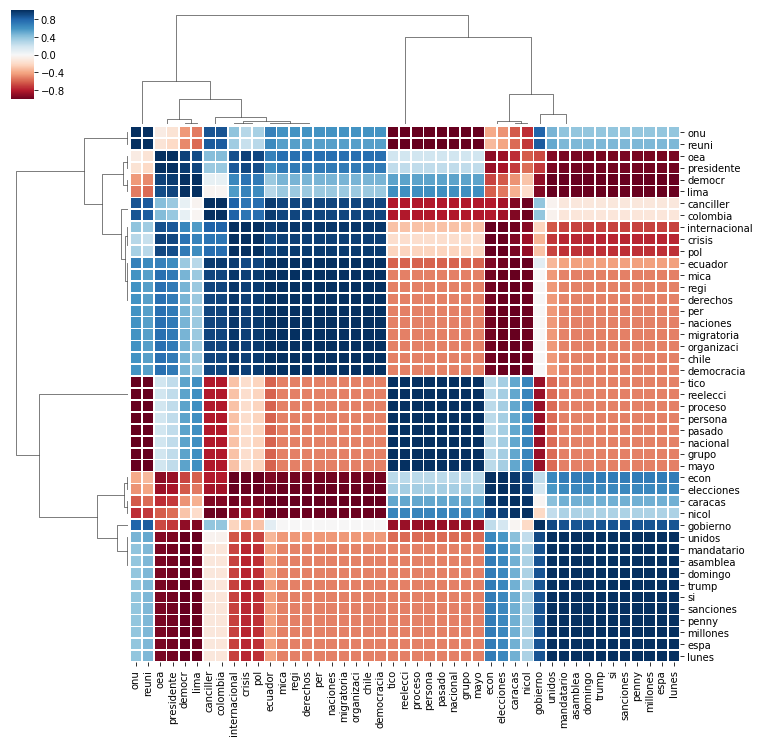

In [241]:
print('---------Cluster map de correlaciones cruzadas entre el top 50 de palabras para POLITICA--------')
cmP=sb.clustermap(df_lda_P.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(cmP.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [196]:
noticias_Politica = noticias[noticias['categoria']=='Politica']
noticias_Politica

fecha_string                fecha  \
2     2018-02-12  2018-02-12T18:10:00   
6     2018-04-09  2018-04-09T17:26:00   
8     2018-04-10  2018-04-10T00:00:00   
10    2018-04-11  2018-04-11T17:39:00   
11    2018-04-13  2018-04-13T00:00:00   
12    2018-04-13  2018-04-13T18:11:00   
13    2018-04-13  2018-04-13T00:00:00   
14    2018-04-14  2018-04-14T16:50:00   
15    2018-04-14  2018-04-14T16:03:00   
16    2018-04-15  2018-04-15T14:21:00   
18    2018-04-18  2018-04-18T22:38:00   
19    2018-04-19  2018-04-19T07:58:00   
21    2018-04-20  2018-04-20T19:10:00   
38    2018-04-30  2018-04-30T17:00:00   
41    2018-05-06  2018-05-06T00:00:00   
43    2018-05-07  2018-05-07T19:42:00   
44    2018-05-08  2018-05-08T15:46:00   
46    2018-05-14  2018-05-14T21:59:00   
49    2018-05-16  2018-05-16T18:53:00   
51    2018-05-17  2018-05-17T18:47:00   
52    2018-05-17  2018-05-17T15:17:00   
53    2018-05-17  2018-05-17T00:00:00   
54    2018-05-18  2018-05-18T21:02:00   
55    2018-05-19  2018-05-19T00:00:00   
57    2018-05-20  2018-05-20T21:36:00   
58    2018-05-20  2018-05-20T15:05:00   
59    2018-05-20  2018-05-20T10:53:00   
60    2018-05-20  2018-05-20T09:12:00   
61    2018-05-20  2018-05-20T00:00:00   
62    2018-05-20  2018-05-20T16:01:00   
..           ...                  ...   
224   2018-08-30  2018-08-30T00:00:52   
230   2018-08-31  2018-08-31T00:00:52   
232   2018-09-03  2018-09-03T00:00:28   
238   2018-09-08  2018-09-08T00:00:28   
239   2018-09-09  2018-09-09T00:00:28   
241   2018-09-10  2018-09-10T00:00:28   
242   2018-09-10  2018-09-10T00:00:28   
251   2018-09-18  2018-09-18T00:00:28   
254   2018-09-19  2018-09-19T00:00:28   
258   2018-09-24  2018-09-24T00:00:12   
259   2018-09-24  2018-09-24T00:00:12   
260   2018-09-24  2018-09-24T00:00:12   
261   2018-09-25  2018-09-25T00:00:12   
263   2018-09-26  2018-09-26T00:00:12   
264   2018-09-26  2018-09-26T00:00:12   
267   2018-09-27  2018-09-27T00:00:12   
268   2018-09-27  2018-09-27T00:00:12   
270   2018-09-29  2018-09-29T00:00:12   
271   2018-09-30  2018-09-30T00:00:12   
275   2018-10-04  2018-10-04T00:00:07   
277   2018-10-05  2018-10-05T00:00:06   
280   2018-10-13  2018-10-13T00:00:03   
281   2018-10-16  2018-10-16T00:00:02   
282   2018-10-18  2018-10-18T00:00:01   
291   2018-11-08  2018-11-08T00:00:00   
295   2018-11-16  2018-11-16T00:00:00   
302   2018-11-22  2018-11-22T00:00:00   
305   2018-11-24  2018-11-24T00:00:00   
307   2018-12-03  2018-12-03T16:09:00   
310   2018-12-12  2018-12-12T18:10:00   

                                                   url  \
2    https://www.eluniverso.com/noticias/2018/12/12...   
6    https://www.eluniverso.com/noticias/2018/04/09...   
8    https://www.eluniverso.com/noticias/2018/04/10...   
10   https://www.eluniverso.com/noticias/2018/04/11...   
11   https://www.eluniverso.com/noticias/2018/04/13...   
12   https://www.eluniverso.com/noticias/2018/04/13...   
13   https://www.eluniverso.com/noticias/2018/04/13...   
14   https://www.eluniverso.com/noticias/2018/04/14...   
15   https://www.eluniverso.com/noticias/2018/04/14...   
16   https://www.eluniverso.com/noticias/2018/04/15...   
18   https://www.eluniverso.com/noticias/2018/04/18...   
19   https://www.eluniverso.com/noticias/2018/04/19...   
21   https://www.eluniverso.com/noticias/2018/04/20...   
38   https://www.eluniverso.com/noticias/2018/04/30...   
41   https://www.eluniverso.com/noticias/2018/05/06...   
43   https://www.eluniverso.com/noticias/2018/05/07...   
44   https://www.eluniverso.com/noticias/2018/05/08...   
46   https://www.eluniverso.com/noticias/2018/05/14...   
49   https://www.eluniverso.com/noticias/2018/05/16...   
51   https://www.eluniverso.com/noticias/2018/05/17...   
52   https://www.eluniverso.com/noticias/2018/05/17...   
53   https://www.eluniverso.com/noticias/2018/05/17...   
54   https://www.eluniverso.com/noticias/2018/05/18...   
55   https://www.eluniverso.com/noticias/2018/05/20...   
57   https:

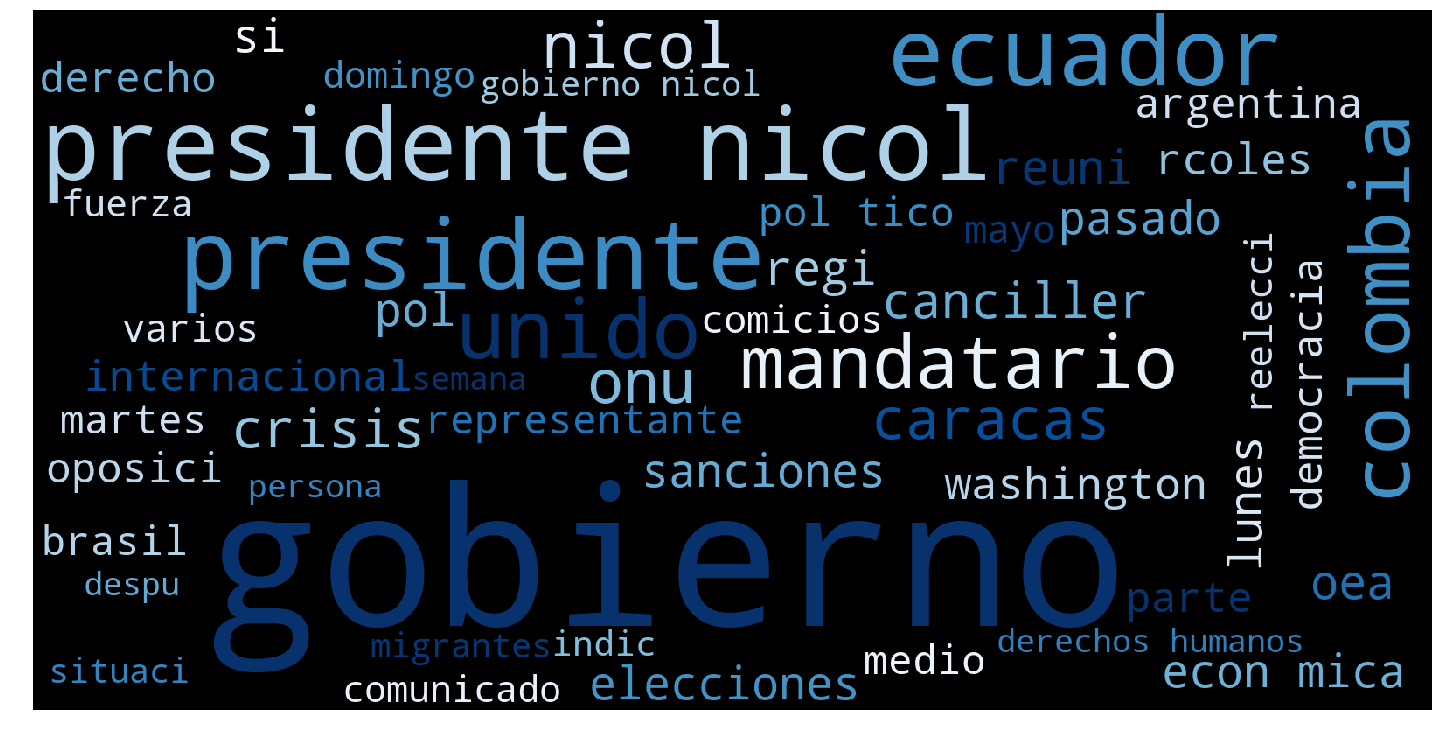

In [242]:
all_words_Poli = noticias_Politica['noticia_limpia'].tolist()
cleaned_words_P = []
for i in all_words_Poli:
    for j in i:
            cleaned_words_P.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_words_series_P = pd.Series(cleaned_words_P)
words_counts_P = cleaned_words_series_P.value_counts()
hashes_P = cleaned_words_series_P.values
hashes_P = hashes_P.tolist()

# convert list to one string with all the words
hashes_words_P = " ".join(hashes_P)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
from wordcloud import WordCloud
wordcloud_P = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 50).generate(hashes_words_P)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud_P)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [198]:
lista_P = hashes_P
lista_P = np.array(lista_P)
lista_P = lista_P[lista_P != ""]
lista_P = list(lista_P)
print(lista_P)

[u'washington', u'colombia', u'pidi', u'rcoles', u'miembros', u'organizaci', u'americanos', u'tomar', u'conciencia', u'crisis', u'humanitaria', u'generada', u'xodo', u'masivo', u'calific', u'dram', u'cruda', u'frente', u'hecho', u'afecta', u'colombiano', u'ord', u'ez', u'sesi', u'consejo', u'permanente', u'realidad', u'humanitaria', u'debe', u'permear', u'discusiones', u'decisiones', u'vayamos', u'tomar', u'seno', u'organizaci', u'ord', u'ez', u'recibe', u'promedio', u'diario', u'fine', u'permanencia', u'albergaba', u'octubre', u'pasado', u'millones', u'persona', u'naci', u'nel', u'diplom', u'tico', u'calific', u'alarmante', u'situaci', u'mil', u'recibido', u'atenci', u'dica', u'gobierno', u'colombiano', u'incluyendo', u'octubre', u'pasado', u'casos', u'malaria', u'desnutrici', u'aguda', u'sarampi', u'difteria', u'tuberculosisord', u'ez', u'apunt', u'autoridades', u'sanitarias', u'colombianas', u'aplicado', u'mil', u'dosis', u'vacunas', u'mil', u'menores', u'edad', u'asisten', u'escuel

In [243]:
pyLDAvis.enable_notebook()
panel_Poli = pyLDAvis.gensim.prepare(ldaP, corpus_lda_P, dictionaryPoli, mds='tsne')
panel_Poli

PreparedData(topic_coordinates=            Freq  cluster  topics            x           y
topic                                                     
1      45.499084        1       1  -632.045471 -384.325073
2      35.627392        1       2 -1209.665405  212.164124
0      18.873520        1       3 -1437.453247 -586.322510, topic_info=     Category      Freq            Term     Total  loglift  logprob
term                                                               
2398  Default  0.000000           nicol  0.000000  30.0000  30.0000
1800  Default  0.000000           grupo  0.000000  29.0000  29.0000
3394  Default  0.000000        nacional  0.000000  28.0000  28.0000
2833  Default  0.000000      presidente  0.000000  27.0000  27.0000
842   Default  0.000000        reelecci  0.000000  26.0000  26.0000
580   Default  0.000000       sanciones  0.000000  25.0000  25.0000
2658  Default  0.000000         caracas  0.000000  24.0000  24.0000
2830  Default  0.000000            lima  0.000000  23.0000  23.0000
3414  Default  0.000000            tico  0.000000  22.0000  22.0000
2877  Default  0.000000         proceso  0.000000  21.0000  21.0000
1049  Default  0.000000          crisis  0.000000  20.0000  20.0000
602   Default  0.000000        gobierno  0.000000  19.0000  19.0000
2155  Default  0.000000          pasado  0.000000  18.0000  18.0000
1555  Default  0.000000           medio  0.000000  17.0000  17.0000
2565  Default  0.000000           nuevo  0.000000  16.0000  16.0000
397   Default  0.000000            tres  0.000000  15.0000  15.0000
2348  Default  0.000000       electoral  0.000000  14.0000  14.0000
724   Default  0.000000            mayo  0.000000  13.0000  13.0000
2881  Default  0.000000            rodr  0.000000  12.0000  12.0000
1152  Default  0.000000          democr  0.000000  11.0000  11.0000
710   Default  0.000000             hab  0.000000  10.0000  10.0000
1275  Default  0.000000  estadounidense  0.000000   9.0000   9.0000
2445  Default  0.000000          santos  0.000000   8.0000   8.0000
469   Default  0.000000    presidencial  0.000000   7.0000   7.0000
1166  Default  0.000000           hacia  0.000000   6.0000   6.0000
304   Default  0.000000            logo  0.000000   5.0000   5.0000
512   Default  0.000000          diplom  0.000000   4.0000   4.0000
2369  Default  0.000000     autoridades  0.000000   3.0000   3.0000
2762  Default  0.000000       militares  0.000000   2.0000   2.0000
3572  Default  0.000000        millones  0.000000   1.0000   1.0000
...       ...       ...             ...       ...      ...      ...
1793   Topic3  0.010240       respuesta  0.030260   0.5839  -6.6752
3414   Topic3  0.022643            tico  0.083026   0.3681  -5.8817
724    Topic3  0.016586            mayo  0.057700   0.4207  -6.1930
2830   Topic3  0.022087            lima  0.084652   0.3239  -5.9065
2833   Topic3  0.059069      presidente  0.304123   0.0287  -4.9228
2155   Topic3  0.021554          pasado  0.083920   0.3081  -5.9310
2369   Topic3  0.013559     autoridades  0.046189   0.4417  -6.3945
2658   Topic3  0.021767         caracas  0.088026   0.2702  -5.9211
677    Topic3  0.009855           campa  0.031046   0.5200  -6.7135
3525   Topic3  0.009092        opositor  0.027827   0.5488  -6.7942
304    Topic3  0.012301            logo  0.042710   0.4226  -6.4919
1152   Topic3  0.020173          democr  0.086625   0.2102  -5.9972
1049   Topic3  0.042252          crisis  0.250279  -0.1115  -5.2579
602    Topic3  0.053310        gobierno  0.354893  -0.2283  -5.0254
3237   Topic3  0.013479           despu  0.049712   0.3623  -6.4004
512    Topic3  0.014731          diplom  0.057641   0.3032  -6.3116
1402   Topic3  0.027326   internacional  0.154807  -0.0669  -5.6937
2174   Topic3  0.027495        colombia  0.157315  -0.0768  -5.6875
1485   Topic3  0.027926             pol  0.168202  -0.1282  -5.6720
1567   Topic3  0.017404         persona  0.079972   0.1424  -6.1448
3370   Topic3  0.021549      mandatario  0.120554  -0.0544

## MIGRACION

In [200]:
corpusMigra=[]
text=[]
for i in range(len(noticias['noticia_lemmatized'])):
    if noticias['categoria'][i]=='Migracion':
        text= ' '.join(noticias['noticia_lemmatized'][i])
        print(text)
        corpusMigra.append(text)

magistrada supremo tribunal federal brasil rechaz noche lunes decisi judicial hab suspendido ingreso tierra frontera norte justifica prop sito dificultades acoger refugiados aplicar soluci f cil cerrar puertas puntualiz magistrada rosa weber fallo divulgado medianoche suspensi ingreso tierra obedeci decisi juez federal emitida domingo argumentando recibir inmigrantes vecino necesario mayor mero trasladado interior brasil a existencia condiciones acogimiento humanitario norte roraima fronterizo locale ecuador comenz ejecutar medida precisaron funcionarios policiales act lugar frontera operaba normalidad brasile nacionalidades permit salida quieran regresar informaron funcionarios
principales novedades proyecciones informativas jornada viernes agosto hoy podr entrar ecuador solo dula canciller ecuador anunci tarde ayer partir bado exigir presentaci pasaporte requisito ingresar territorio ecuatoriano hoy permite ingreso dula identidad anuncio lleg precisar informaci previamente dio minist

In [202]:
# remove common words and tokenize
list3 = ['Venezuela','Maduro','venezolano','venezolanos','venezonlanas','venezolana','maduro','an','bol','c','d','dijo','do','est','s','seg','tambi','tras','venezuela','cada','agreg','cr','n','m','p','l','r','tica','rica','ser']
stoplist3 = stopwords.words('spanish') + list(punctuation) + list3

textsMigra = [[word for word in str(document).lower().split() if word not in stoplist3] for document in corpusMigra]
dictionaryMigra = corpora.Dictionary(textsMigra)
dictionaryMigra.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
#print(dictionary)
corpusM = [dictionaryMigra.doc2bow(text) for text in textsMigra]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpusM)
from gensim import corpora, models, similarities
tfidf_M = models.TfidfModel(corpusM)
corpus_tfidf_M = tfidf_M[corpusM] 

In [203]:
ldaM = models.LdaModel(corpusM, id2word=dictionaryMigra, num_topics=total_topics)
corpus_lda_M = ldaM[corpus_tfidf_M] 
ldaM.show_topics(total_topics,5)
from collections import OrderedDict

data_lda_M = {i: OrderedDict(ldaM.show_topic(i,25)) for i in range(total_topics)}
df_lda_M = pd.DataFrame(data_lda_M)
print(df_lda_M.shape)
df_lda_M = df_lda_M.fillna(0).T
print(df_lda_M.shape)
df_lda_M

(69, 5)
(5, 69)


agosto      bado    brasil  canciller   caracas    cerrar     chile  \
0  0.000000  0.002222  0.000000   0.000000  0.000000  0.000000  0.006526   
1  0.000000  0.002726  0.005794   0.003017  0.002584  0.002558  0.000000   
2  0.004188  0.005060  0.002854   0.000000  0.000000  0.000000  0.003256   
3  0.000000  0.002693  0.004197   0.000000  0.000000  0.000000  0.004186   
4  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   

   chilenos      cita    ciudad    ...        reuni     salud  seguridad  \
0  0.002446  0.000000  0.000000    ...     0.000000  0.000000    0.00000   
1  0.000000  0.000000  0.002462    ...     0.000000  0.000000    0.00000   
2  0.000000  0.000000  0.000000    ...     0.000000  0.000000    0.00000   
3  0.000000  0.003289  0.000000    ...     0.002953  0.000000    0.00337   
4  0.000000  0.000000  0.002844    ...     0.000000  0.001985    0.00000   

         si   situaci      solo  terminal  territorio       vez  viajeros  
0  0.002738  0.003063  0.000000  0.000000    0.000000  0.000000  0.000000  
1  0.000000  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.003571  0.000000    0.002929  0.002794  0.000000  
3  0.000000  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  
4  0.000000  0.000000  0.000000  0.002203    0.000000  0.002834  0.002048  

[5 rows x 69 columns]

---------Cluster map de correlaciones cruzadas entre el top 50 de palabras para MIGRACION--------


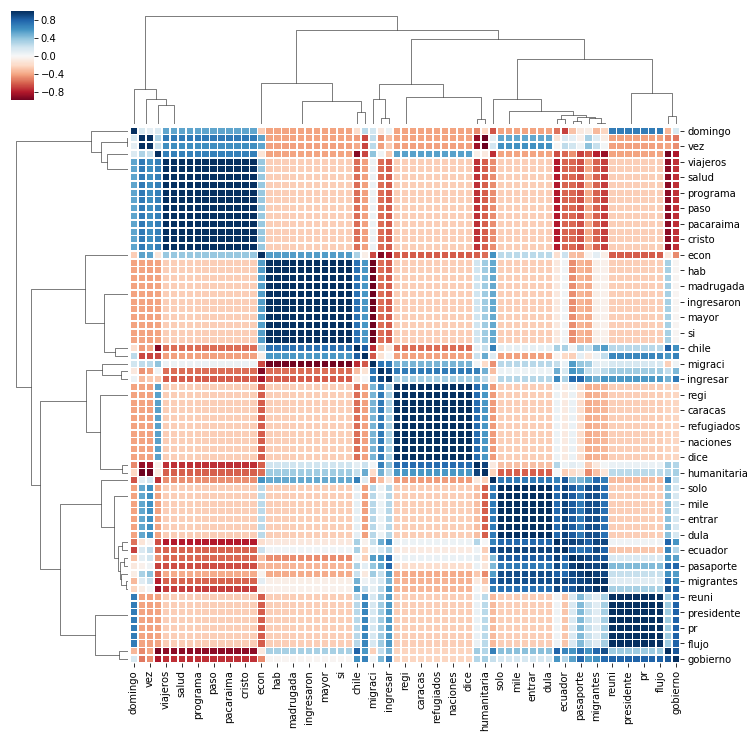

In [205]:
print('---------Cluster map de correlaciones cruzadas entre el top 50 de palabras para MIGRACION--------')
cmM=sb.clustermap(df_lda_M.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(cmM.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [206]:
noticias_Migracion = noticias[noticias['categoria']=='Migracion']
noticias_Migracion

fecha_string                fecha  \
143   2018-08-06  2018-08-06T17:23:20   
158   2018-08-17  2018-08-17T00:00:92   
159   2018-08-17  2018-08-17T00:00:92   
160   2018-08-17  2018-08-17T00:00:92   
162   2018-08-17  2018-08-17T00:00:92   
164   2018-08-18  2018-08-18T00:00:92   
166   2018-08-18  2018-08-18T00:00:92   
167   2018-08-18  2018-08-18T00:00:92   
169   2018-08-19  2018-08-19T00:00:92   
170   2018-08-19  2018-08-19T00:00:92   
171   2018-08-19  2018-08-19T00:00:92   
172   2018-08-19  2018-08-19T00:00:92   
175   2018-08-20  2018-08-20T00:00:92   
177   2018-08-20  2018-08-20T00:00:92   
179   2018-08-20  2018-08-20T00:00:92   
180   2018-08-20  2018-08-20T00:00:92   
181   2018-08-21  2018-08-21T00:00:92   
184   2018-08-21  2018-08-21T00:00:92   
185   2018-08-21  2018-08-21T00:00:92   
186   2018-08-21  2018-08-21T00:00:92   
188   2018-08-21  2018-08-21T00:00:92   
189   2018-08-21  2018-08-21T00:00:92   
191   2018-08-21  2018-08-21T00:00:92   
197   2018-08-24  2018-08-24T00:00:52   
199   2018-08-24  2018-08-24T00:00:52   
203   2018-08-25  2018-08-25T00:00:52   
205   2018-08-26  2018-08-26T00:00:52   
206   2018-08-27  2018-08-27T00:00:52   
207   2018-08-27  2018-08-27T00:00:52   
208   2018-08-27  2018-08-27T00:00:52   
210   2018-08-27  2018-08-27T00:00:52   
212   2018-08-27  2018-08-27T00:00:52   
214   2018-08-28  2018-08-28T00:00:52   
219   2018-08-29  2018-08-29T00:00:52   
220   2018-08-29  2018-08-29T00:00:52   
222   2018-08-29  2018-08-29T00:00:52   
223   2018-08-29  2018-08-29T00:00:52   
225   2018-08-31  2018-08-31T00:00:52   
227   2018-08-31  2018-08-31T00:00:52   
236   2018-09-05  2018-09-05T00:00:28   
237   2018-09-08  2018-09-08T00:00:28   
292   2018-11-09  2018-11-09T00:00:00   
293   2018-11-12  2018-11-12T00:00:00   

                                                   url  \
143  https://www.eluniverso.com/noticias/nota/68945...   
158  https://www.eluniverso.com/noticias/2018/08/17...   
159  https://www.eluniverso.com/noticias/2018/08/17...   
160  https://www.eluniverso.com/noticias/2018/08/17...   
162  https://www.eluniverso.com/noticias/2018/08/17...   
164  https://www.eluniverso.com/noticias/2018/08/18...   
166  https://www.eluniverso.com/noticias/2018/08/18...   
167  https://www.eluniverso.com/noticias/2018/08/18...   
169  https://www.eluniverso.com/noticias/2018/08/19...   
170  https://www.eluniverso.com/noticias/2018/08/19...   
171  https://www.eluniverso.com/noticias/2018/08/19...   
172  https://www.eluniverso.com/noticias/2018/08/19...   
175  https://www.eluniverso.com/noticias/2018/08/20...   
177  https://www.eluniverso.com/noticias/2018/08/20...   
179  https://www.eluniverso.com/noticias/2018/08/20...   
180  https://www.eluniverso.com/noticias/2018/08/20...   
181  https://www.eluniverso.com/noticias/2018/08/21...   
184  https://www.eluniverso.com/noticias/2018/08/21...   
185  https://www.eluniverso.com/noticias/2018/08/21...   
186  https://www.eluniverso.com/noticias/2018/08/21...   
188  https://www.eluniverso.com/guayaquil/2018/08/2...   
189  https://www.eluniverso.com/noticias/2018/08/21...   
191  https://www.eluniverso.com/noticias/2018/08/21...   
197  https://www.eluniverso.com/opinion/2018/08/24/...   
199  https://www.eluniverso.com/noticias/2018/08/24...   
203  https://www.eluniverso.com/noticias/2018/08/25...   
205  https://www.eluniverso.com/noticias/2018/08/26...   
206  https://www.eluniverso.com/guayaquil/2018/08/2...   
207  https://www.eluniverso.com/noticias/2018/08/27...   
208  https://www.eluniverso.com/noticias/2018/08/27...   
210  https://www.eluniverso.com/noticias/2018/08/27...   
212  https://www.eluniverso.com/noticias/2018/08/27...   
214  https://www.eluniverso.com/noticias/2018/08/28...   
219  https://www.eluniverso.com/noticias/2018/08/29...   
220  https://www.eluniverso.com/noticias/2018/08/29...   
222  https://www.eluniverso.com/noticias/2018/08/29...   
223  https://www.eluniverso.com/noticias/2018/08/29..

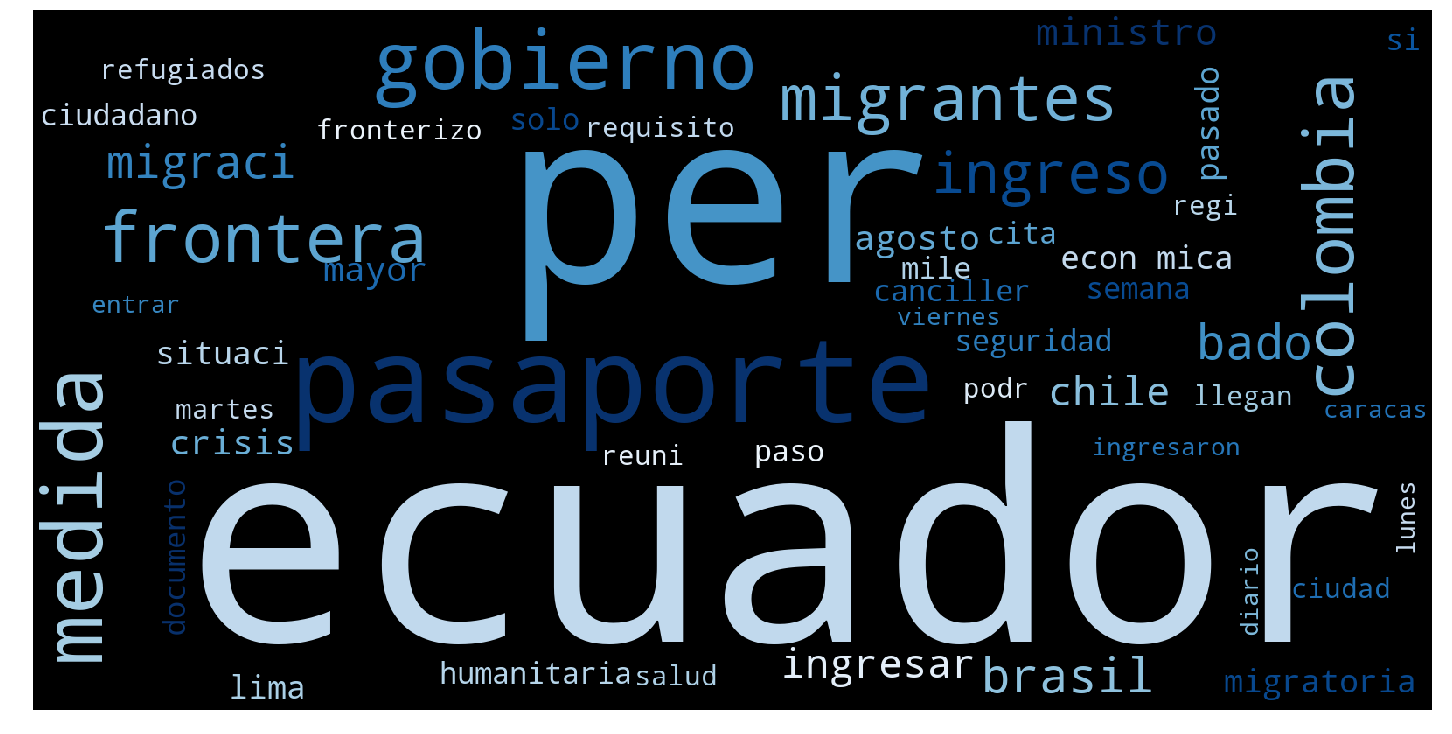

In [207]:
all_words_Migra = noticias_Migracion['noticia_limpia'].tolist()
cleaned_words_M = []
for i in all_words_Migra:
    for j in i:
            cleaned_words_M.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_words_series_M = pd.Series(cleaned_words_M)
words_counts_M = cleaned_words_series_M.value_counts()
hashes_M = cleaned_words_series_M.values
hashes_M = hashes_M.tolist()

# convert list to one string with all the words
hashes_words_M = " ".join(hashes_M)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
from wordcloud import WordCloud
wordcloud_M = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 50).generate(hashes_words_M)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud_M)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [209]:
lista_M = hashes_M
lista_M = np.array(lista_P)
lista_M = lista_M[lista_M != ""]
lista_M = list(lista_M)
print(lista_M)

[u'washington', u'colombia', u'pidi', u'rcoles', u'miembros', u'organizaci', u'americanos', u'tomar', u'conciencia', u'crisis', u'humanitaria', u'generada', u'xodo', u'masivo', u'calific', u'dram', u'cruda', u'frente', u'hecho', u'afecta', u'colombiano', u'ord', u'ez', u'sesi', u'consejo', u'permanente', u'realidad', u'humanitaria', u'debe', u'permear', u'discusiones', u'decisiones', u'vayamos', u'tomar', u'seno', u'organizaci', u'ord', u'ez', u'recibe', u'promedio', u'diario', u'fine', u'permanencia', u'albergaba', u'octubre', u'pasado', u'millones', u'persona', u'naci', u'nel', u'diplom', u'tico', u'calific', u'alarmante', u'situaci', u'mil', u'recibido', u'atenci', u'dica', u'gobierno', u'colombiano', u'incluyendo', u'octubre', u'pasado', u'casos', u'malaria', u'desnutrici', u'aguda', u'sarampi', u'difteria', u'tuberculosisord', u'ez', u'apunt', u'autoridades', u'sanitarias', u'colombianas', u'aplicado', u'mil', u'dosis', u'vacunas', u'mil', u'menores', u'edad', u'asisten', u'escuel

In [210]:
pyLDAvis.enable_notebook()
panel_Migra = pyLDAvis.gensim.prepare(ldaM, corpus_lda_M, dictionaryMigra, mds='tsne')
panel_Migra

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
2      44.609322        1       1  186.297592  116.090782
1      25.076277        1       2  -18.935238  -29.334442
4      10.129330        1       3   83.135971 -140.976379
0      10.093608        1       4   35.367111  105.971657
3      10.091471        1       5  178.233627  -29.906353, topic_info=     Category      Freq          Term     Total  loglift  logprob
term                                                             
1624  Default  0.000000     pasaporte  0.000000  30.0000  30.0000
1230  Default  0.000000           per  0.000000  29.0000  29.0000
284   Default  0.000000         chile  0.000000  28.0000  28.0000
283   Default  0.000000      gobierno  0.000000  27.0000  27.0000
514   Default  0.000000        crisis  0.000000  26.0000  26.0000
1058  Default  0.000000      colombia  0.000000  25.0000  25.0000
1166  Default  0.000000      frontera  0.000000  24.0000  24.0000
128   Default  0.000000      ingresar  0.000000  23.0000  23.0000
1374  Default  0.000000          econ  0.000000  22.0000  22.0000
1068  Default  0.000000       ecuador  0.000000  21.0000  21.0000
590   Default  0.000000         flujo  0.000000  20.0000  20.0000
610   Default  0.000000        brasil  0.000000  19.0000  19.0000
110   Default  0.000000         mayor  0.000000  18.0000  18.0000
14    Default  0.000000    ingresaron  0.000000  17.0000  17.0000
343   Default  0.000000           hab  0.000000  16.0000  16.0000
437   Default  0.000000       domingo  0.000000  15.0000  15.0000
1117  Default  0.000000   humanitaria  0.000000  14.0000  14.0000
628   Default  0.000000          cita  0.000000  13.0000  13.0000
1158  Default  0.000000            pr  0.000000  12.0000  12.0000
497   Default  0.000000         reuni  0.000000  11.0000  11.0000
850   Default  0.000000          mica  0.000000  10.0000  10.0000
1116  Default  0.000000     seguridad  0.000000   9.0000   9.0000
1190  Default  0.000000     migrantes  0.000000   8.0000   8.0000
582   Default  0.000000      chilenos  0.000000   7.0000   7.0000
164   Default  0.000000  provenientes  0.000000   6.0000   6.0000
1366  Default  0.000000    presidente  0.000000   5.0000   5.0000
1028  Default  0.000000     pacaraima  0.000000   4.0000   4.0000
1364  Default  0.000000          lima  0.000000   3.0000   3.0000
511   Default  0.000000  compatriotas  0.000000   2.0000   2.0000
938   Default  0.000000     identidad  0.000000   1.0000   1.0000
...       ...       ...           ...       ...      ...      ...
283    Topic5  0.030688      gobierno  0.200857   0.4148  -4.9516
1624   Topic5  0.046899     pasaporte  0.376479   0.2106  -4.5275
128    Topic5  0.023193      ingresar  0.154883   0.3946  -5.2316
628    Topic5  0.014272          cita  0.081278   0.5539  -5.7172
497    Topic5  0.012814         reuni  0.071047   0.5807  -5.8249
1230   Topic5  0.044947           per  0.406436   0.0915  -4.5700
1555   Topic5  0.009734         vigor  0.050683   0.6435  -6.0999
1058   Topic5  0.023313      colombia  0.189974   0.1956  -5.2265
284    Topic5  0.018164         chile  0.130191   0.3239  -5.4760
1366   Topic5  0.011914    presidente  0.071318   0.5040  -5.8978
1581   Topic5  0.010594         despu  0.059662   0.5651  -6.0151
938    Topic5  0.013739     identidad  0.092710   0.3842  -5.7553
610    Topic5  0.018211        brasil  0.150868   0.1791  -5.4734
403    Topic5  0.009312   inmigrantes  0.051992   0.5737  -6.1442
1166   Topic5  0.019824      frontera  0.191757   0.0242  -5.3886
185    Topic5  0.007791        rcoles  0.040056   0.6562  -6.3225
1028   Topic5  0.009806     pacaraima  0.061004   0.4656  -6.0924
1068   Topic5  0.030019       ecuador  0.530029  -0.5776  -4.9737
1190   Topic5  0.017355     migrantes  0.187870  -0.0884  -5.5216
1427   Topic5  0.016358       ingreso  0.177012  -0.0880  -5.5807
14     Topic5  0.009706    ingresaron  0.061364   0.4

## REPRESION

In [211]:
corpusRepre=[]
text=[]
for i in range(len(noticias['noticia_lemmatized'])):
    if noticias['categoria'][i]=='Represion':
        text= ' '.join(noticias['noticia_lemmatized'][i])
        print(text)
        corpusRepre.append(text)

presidente nicol rest importancia rcoles posible retiro asuma segundo mandato enero critican investidura pueden ir gustenlos gobiernos hagan quieran si quieren ir
fiscal general anunci espa apres solicitados justicia local presuntos hechos corrupci relacionados caso papeles panam adri vel squez figueroa claudia guill ex secretaria fondo nacional desarrollo nacional detenidos espa solicitud autoridades venezolanas pidieron interpol captura internacional indic cuenta twitter fiscal general tarek william saab lea nicol habr recibido millones odebrecht campa vel squez figueroa identificado medios miembro equipo seguridad fallecido presidente hugo ch vez autoridades confirmaron informaci saab detenidos investigados caso conocido internacionalmente papeles panam estall hace masiva filtraci documentos bufete jur dico paname mossackfonseca sac luz mo gente poder famosa escond fortuna trav cuentas ultramar plaza consideradas so fiscales
unidos acord naciones fortalecer cooperaci localizar decom

In [212]:
# remove common words and tokenize
list4 = ['Venezuela','Maduro','venezolano','venezolanos','venezonlanas','venezolana','maduro','an','bol','c','d','dijo','do','est','s','seg','tambi','tras','venezuela','cada','agreg','cr','n','m','p','l','r','tica','rica','ser']
stoplist3 = stopwords.words('spanish') + list(punctuation) + list4

textsRepre = [[word for word in str(document).lower().split() if word not in stoplist3] for document in corpusRepre]
dictionaryRepre = corpora.Dictionary(textsRepre)
dictionaryRepre.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
#print(dictionary)
corpusR = [dictionaryRepre.doc2bow(text) for text in textsRepre]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpusR)
from gensim import corpora, models, similarities
tfidf_R = models.TfidfModel(corpusR)
corpus_tfidf_R = tfidf_R[corpusR] 

In [213]:
ldaR = models.LdaModel(corpusR, id2word=dictionaryRepre, num_topics=total_topics)
corpus_lda_R = ldaR[corpus_tfidf_R] 
ldaR.show_topics(total_topics,5)
from collections import OrderedDict

data_lda_R = {i: OrderedDict(ldaR.show_topic(i,25)) for i in range(total_topics)}
df_lda_R = pd.DataFrame(data_lda_R)
print(df_lda_R.shape)
df_lda_R = df_lda_R.fillna(0).T
print(df_lda_R.shape)
df_lda_R

(75, 5)
(5, 75)


acusados   agentes  alimentos      alto    anunci  aparentemente   armada  \
0  0.000000  0.000000   0.000000  0.000000  0.000000       0.000000  0.00000   
1  0.000000  0.000000   0.000000  0.000000  0.002855       0.000000  0.00000   
2  0.002393  0.002695   0.000000  0.003189  0.000000       0.002923  0.00000   
3  0.000000  0.000000   0.003259  0.000000  0.002217       0.000000  0.00237   
4  0.000000  0.000000   0.000000  0.000000  0.000000       0.000000  0.00000   

   atentado    aunque  autoridades    ...        redes    santos  seguridad  \
0  0.005279  0.002276     0.000000    ...     0.002302  0.002373   0.000000   
1  0.000000  0.000000     0.002863    ...     0.000000  0.000000   0.000000   
2  0.000000  0.000000     0.002851    ...     0.000000  0.000000   0.003901   
3  0.000000  0.000000     0.000000    ...     0.000000  0.000000   0.000000   
4  0.000000  0.000000     0.003421    ...     0.000000  0.000000   0.000000   

   televisi     ticos      tres      unas    unidos   viernes      zeid  
0   0.00246  0.000000  0.000000  0.000000  0.004161  0.000000  0.000000  
1   0.00000  0.002693  0.000000  0.000000  0.000000  0.004562  0.000000  
2   0.00000  0.000000  0.000000  0.003263  0.003185  0.000000  0.003037  
3   0.00000  0.003196  0.000000  0.000000  0.000000  0.000000  0.000000  
4   0.00000  0.000000  0.002562  0.000000  0.000000  0.000000  0.000000  

[5 rows x 75 columns]

---------Cluster map de correlaciones cruzadas entre el top 50 de palabras para REPRESION--------


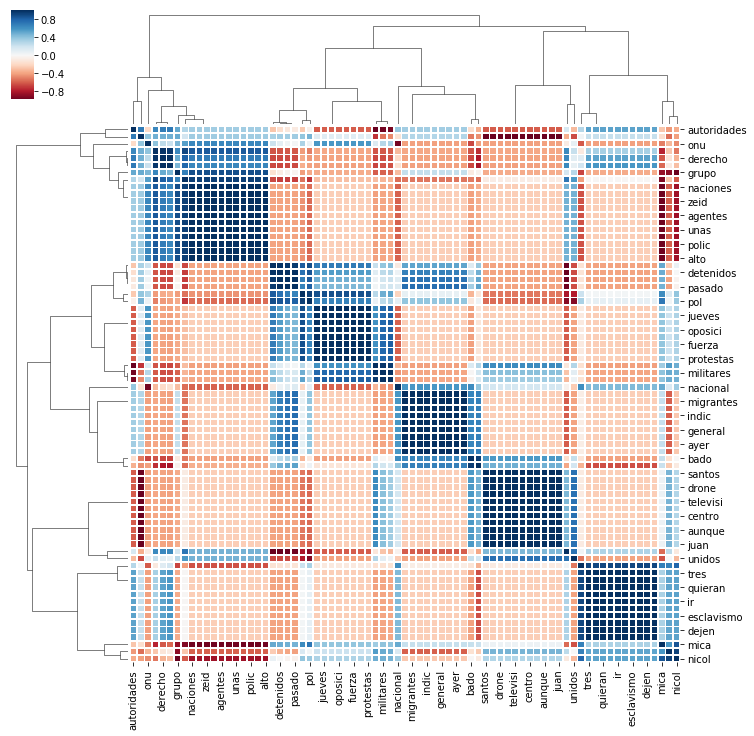

In [214]:
print('---------Cluster map de correlaciones cruzadas entre el top 50 de palabras para REPRESION--------')
cmR=sb.clustermap(df_lda_R.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(cmR.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [215]:
noticias_Represion = noticias[noticias['categoria']=='Represion']
noticias_Represion

fecha_string                fecha  \
3     2018-02-12  2018-02-12T00:00:00   
9     2018-04-10  2018-04-10T07:17:00   
22    2018-04-21  2018-04-21T21:57:00   
75    2018-05-26  2018-05-26T00:00:00   
76    2018-05-27  2018-05-27T20:05:00   
78    2018-05-29  2018-05-29T19:21:00   
80    2018-06-01  2018-06-01T18:01:00   
86    2018-06-04  2018-06-04T00:00:00   
91    2018-06-07  2018-06-07T00:00:00   
106   2018-06-22  2018-06-22T00:00:00   
107   2018-06-22  2018-06-22T09:34:00   
108   2018-06-23  2018-06-23T00:00:00   
112   2018-06-27  2018-06-27T17:06:00   
113   2018-07-05  2018-07-05T00:00:00   
119   2018-07-12  2018-07-12T17:37:00   
121   2018-07-15  2018-07-15T00:00:00   
127   2018-07-23  2018-07-23T10:37:00   
139   2018-08-04  2018-08-04T20:09:00   
140   2018-08-04  2018-08-04T22:33:00   
141   2018-08-05  2018-08-05T00:18:15   
157   2018-08-16  2018-08-16T00:00:92   
173   2018-08-19  2018-08-19T00:00:92   
192   2018-08-22  2018-08-22T00:00:52   
216   2018-08-28  2018-08-28T00:00:52   
218   2018-08-28  2018-08-28T00:00:52   
235   2018-09-05  2018-09-05T00:00:28   
245   2018-09-14  2018-09-14T00:00:28   
247   2018-09-14  2018-09-14T00:00:28   
252   2018-09-18  2018-09-18T00:00:28   
253   2018-09-19  2018-09-19T00:00:28   
255   2018-09-21  2018-09-21T00:00:28   
266   2018-09-26  2018-09-26T00:00:12   
269   2018-09-28  2018-09-28T00:00:12   
272   2018-10-01  2018-10-01T00:00:09   
276   2018-10-04  2018-10-04T00:00:07   
278   2018-10-05  2018-10-05T00:00:06   
289   2018-11-01  2018-11-01T00:00:00   
298   2018-11-20  2018-11-20T00:00:00   
299   2018-11-21  2018-11-21T00:00:00   
300   2018-11-21  2018-11-21T00:00:00   
304   2018-11-23  2018-11-23T00:00:00   
309   2018-12-12  2018-12-12T00:00:00   

                                                   url  \
3    https://www.eluniverso.com/noticias/2018/12/12...   
9    https://www.eluniverso.com/noticias/2018/04/10...   
22   https://www.eluniverso.com/noticias/2018/04/19...   
75   https://www.eluniverso.com/noticias/2018/05/26...   
76   https://www.eluniverso.com/noticias/2018/05/27...   
78   https://www.eluniverso.com/noticias/2018/05/29...   
80   https://www.eluniverso.com/noticias/2018/06/01...   
86   https://www.eluniverso.com/noticias/2018/06/04...   
91   https://www.eluniverso.com/noticias/2018/06/08...   
106  https://www.eluniverso.com/noticias/2018/06/22...   
107  https://www.eluniverso.com/noticias/2018/06/22...   
108  https://www.eluniverso.com/noticias/2018/06/23...   
112  https://www.eluniverso.com/noticias/2018/06/27...   
113  https://www.eluniverso.com/noticias/2018/07/06...   
119  https://www.eluniverso.com/noticias/2018/07/12...   
121  https://www.eluniverso.com/noticias/2018/07/15...   
127  https://www.eluniverso.com/noticias/nota/68736...   
139  https://www.eluniverso.com/noticias/nota/68904...   
140  https://www.eluniverso.com/noticias/nota/68908...   
141  https://www.eluniverso.com/noticias/nota/68932...   
157  https://www.eluniverso.com/noticias/2018/08/16...   
173  https://www.eluniverso.com/noticias/2018/08/19...   
192  https://www.eluniverso.com/noticias/2018/08/22...   
216  https://www.eluniverso.com/noticias/2018/08/28...   
218  https://www.eluniverso.com/noticias/2018/08/28...   
235  https://www.eluniverso.com/noticias/2018/09/05...   
245  https://www.eluniverso.com/noticias/2018/09/14...   
247  https://www.eluniverso.com/noticias/2018/09/14...   
252  https://www.eluniverso.com/noticias/2018/09/18...   
253  https://www.eluniverso.com/noticias/2018/09/19...   
255  https://www.eluniverso.com/noticias/2018/09/20...   
266  https://www.eluniverso.com/noticias/2018/09/26...   
269  https://www.eluniverso.com/noticias/2018/09/28...   
272  https://www.eluniverso.com/noticias/2018/10/01...   
276  https://www.eluniverso.com/noticias/2018/10/04...   
278  https://www.eluniverso.com/noticias/2018/10/05...   
289  https://www.eluniverso.com/noticias/2018/11/01...   
298  https://www.eluniverso.com/noti

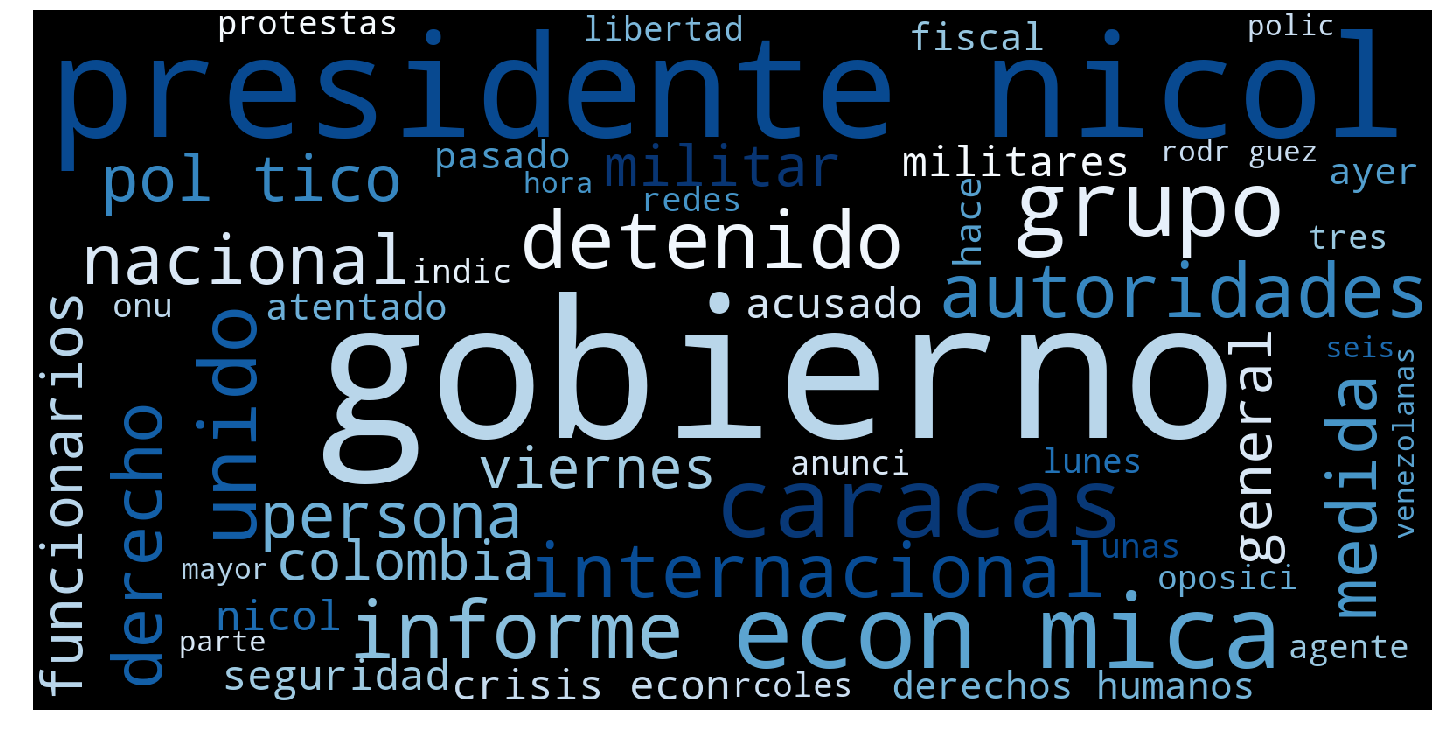

In [216]:
all_words_Repre = noticias_Represion['noticia_limpia'].tolist()
cleaned_words_R = []
for i in all_words_Repre:
    for j in i:
            cleaned_words_R.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_words_series_R = pd.Series(cleaned_words_R)
words_counts_R = cleaned_words_series_R.value_counts()
hashes_R = cleaned_words_series_R.values
hashes_R = hashes_R.tolist()

# convert list to one string with all the words
hashes_words_R = " ".join(hashes_R)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
from wordcloud import WordCloud
wordcloud_R = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 50).generate(hashes_words_R)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud_R)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [217]:
lista_R = hashes_R
lista_R = np.array(lista_R)
lista_R = lista_R[lista_R != ""]
lista_R = list(lista_R)
print(lista_R)

[u'presidente', u'nicol', u'rest', u'importancia', u'rcoles', u'posible', u'retiro', u'asuma', u'segundo', u'mandato', u'enero', u'critican', u'investidura', u'pueden', u'ir', u'gustenlos', u'gobiernos', u'hagan', u'quieran', u'si', u'quieren', u'ir', u'fiscal', u'general', u'anunci', u'espa', u'apres', u'solicitados', u'justicia', u'local', u'presuntos', u'hechos', u'corrupci', u'relacionados', u'caso', u'papeles', u'panam', u'adri', u'vel', u'squez', u'figueroa', u'claudia', u'guill', u'ex', u'secretaria', u'fondo', u'nacional', u'desarrollo', u'nacional', u'detenidos', u'espa', u'solicitud', u'autoridades', u'venezolanas', u'pidieron', u'interpol', u'captura', u'internacional', u'indic', u'cuenta', u'twitter', u'fiscal', u'general', u'tarek', u'william', u'saab', u'lea', u'nicol', u'habr', u'recibido', u'millones', u'odebrecht', u'campa', u'vel', u'squez', u'figueroa', u'identificado', u'medios', u'miembro', u'equipo', u'seguridad', u'fallecido', u'presidente', u'hugo', u'ch', u'vez

In [218]:
pyLDAvis.enable_notebook()
panel_Repre = pyLDAvis.gensim.prepare(ldaR, corpus_lda_R, dictionaryRepre, mds='tsne')
panel_Repre

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
3      42.559170        1       1   79.794334 -221.109711
4      27.400934        1       2  -20.316551  102.046425
1      10.024195        1       3  210.356506    3.260149
2      10.010108        1       4 -169.650803 -201.646317
0      10.005593        1       5 -263.543427   40.376747, topic_info=     Category      Freq           Term     Total  loglift  logprob
term                                                              
326   Default  0.000000       gobierno  0.000000  30.0000  30.0000
1525  Default  0.000000     presidente  0.000000  29.0000  29.0000
604   Default  0.000000        informe  0.000000  28.0000  28.0000
989   Default  0.000000          grupo  0.000000  27.0000  27.0000
1294  Default  0.000000          nicol  0.000000  26.0000  26.0000
1345  Default  0.000000       atentado  0.000000  25.0000  25.0000
781   Default  0.000000         unidos  0.000000  24.0000  24.0000
298   Default  0.000000        viernes  0.000000  23.0000  23.0000
1808  Default  0.000000          drone  0.000000  22.0000  22.0000
1826  Default  0.000000       nacional  0.000000  21.0000  21.0000
1331  Default  0.000000      migrantes  0.000000  20.0000  20.0000
1234  Default  0.000000      seguridad  0.000000  19.0000  19.0000
749   Default  0.000000           bado  0.000000  18.0000  18.0000
1274  Default  0.000000    autoridades  0.000000  17.0000  17.0000
1534  Default  0.000000           econ  0.000000  16.0000  16.0000
546   Default  0.000000           alto  0.000000  15.0000  15.0000
1701  Default  0.000000           ayer  0.000000  14.0000  14.0000
99    Default  0.000000          indic  0.000000  13.0000  13.0000
1480  Default  0.000000           zeid  0.000000  12.0000  12.0000
981   Default  0.000000   funcionarios  0.000000  11.0000  11.0000
441   Default  0.000000       naciones  0.000000  10.0000  10.0000
973   Default  0.000000        general  0.000000   9.0000   9.0000
1552  Default  0.000000           rodr  0.000000   8.0000   8.0000
978   Default  0.000000  aparentemente  0.000000   7.0000   7.0000
463   Default  0.000000       detenido  0.000000   6.0000   6.0000
757   Default  0.000000       derechos  0.000000   5.0000   5.0000
1679  Default  0.000000         centro  0.000000   4.0000   4.0000
963   Default  0.000000         manuel  0.000000   3.0000   3.0000
1366  Default  0.000000     explosivos  0.000000   2.0000   2.0000
1433  Default  0.000000        caracas  0.000000   1.0000   1.0000
...       ...       ...            ...       ...      ...      ...
544    Topic5  0.009565         aunque  0.033053   1.0620  -6.0853
781    Topic5  0.017484         unidos  0.082647   0.7488  -5.4821
1667   Topic5  0.007336        dijeron  0.022657   1.1743  -6.3506
1213   Topic5  0.007643         sector  0.024109   1.1532  -6.3096
1404   Topic5  0.008492          trata  0.028280   1.0990  -6.2042
1112   Topic5  0.010337       televisi  0.038873   0.9775  -6.0076
1525   Topic5  0.030587     presidente  0.212326   0.3645  -4.9228
346    Topic5  0.008413       discurso  0.028657   1.0765  -6.2136
253    Topic5  0.009357   presidencial  0.033941   1.0135  -6.1073
673    Topic5  0.007729       internet  0.025497   1.1084  -6.2985
1830   Topic5  0.005789   apartamentos  0.016893   1.2312  -6.5874
1294   Topic5  0.027698          nicol  0.273041   0.0138  -5.0220
1147   Topic5  0.005970          house  0.018069   1.1945  -6.5567
326    Topic5  0.023318       gobierno  0.230689   0.0102  -5.1942
1368   Topic5  0.006796         parada  0.023458   1.0632  -6.4270
1433   Topic5  0.016477        caracas  0.138106   0.1760  -5.5414
981    Topic5  0.011419   funcionarios  0.074785   0.4227  -5.9081
1635   Topic5  0.007084    detenciones  0.026441   0.9849  -6.3856
1199   Topic5  0.009676          redes  0.054219   0.5786  -6.0738
1534   Topic5  0.016462           econ  0.192018  -0.1545  -5.5424


## SOCIEDAD

In [219]:
corpusSoci=[]
text=[]
for i in range(len(noticias['noticia_lemmatized'])):
    if noticias['categoria'][i]=='Sociedad':
        text= ' '.join(noticias['noticia_lemmatized'][i])
        print(text)
        corpusSoci.append(text)

gobierno sebasti pi anunci lunes otorgar visa especial responsabilidad democr huyen crisis democr enfrenta gobierno nicol impuso visa consular restringir llegada haitianos medio mayores oleadas emigrantes pi hab llegado momento poner orden hogar duplicarse tasa extranjeros viven chile hoy alcanza mill persona casi tercio situaci irregular caso tomando consideraci grave crisis democr actualmente atraviesa pi decidi crear visa responsabilidad democr deber solicitada consulado chileno caracas prorrogable vez posibilita luego pedir residencia definitiva modalidad haitianos haitianos cambio homologando situaci gran mayor am latina pi determin exigir visa consular turismo simple derecho ingreso permanencia chile periodo ximo a
cantante ricardo montaner organizaci human right watch anunciaron hoy campa solidaridad favor pueblo dirige especial gobiernos posturas ambiguas crisis humanitaria latinoamericano montaner organizaci piden ciudadanos pie alzar voz demostrar pueblo van tolerar gobierno 

In [222]:
# remove common words and tokenize
list5 = ['Venezuela','Maduro','venezolano','venezolanos','venezonlanas','venezolana','maduro','an','bol','c','d','dijo','do','est','s','seg','tambi','tras','venezuela','cada','agreg','cr','n','m','p','l','r','tica','rica','ser','ah','all','b']
stoplist5 = stopwords.words('spanish') + list(punctuation) + list5

textsSoci = [[word for word in str(document).lower().split() if word not in stoplist5] for document in corpusSoci]
dictionarySoci = corpora.Dictionary(textsSoci)
dictionarySoci.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
#print(dictionary)
corpusS = [dictionarySoci.doc2bow(text) for text in textsSoci]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpusS)
from gensim import corpora, models, similarities
tfidf_S = models.TfidfModel(corpusS)
corpus_tfidf_S = tfidf_S[corpusS] 

In [223]:
ldaS = models.LdaModel(corpusS, id2word=dictionarySoci, num_topics=total_topics)
corpus_lda_S = ldaS[corpus_tfidf_S] 
ldaS.show_topics(total_topics,5)
from collections import OrderedDict

data_lda_S = {i: OrderedDict(ldaS.show_topic(i,25)) for i in range(total_topics)}
df_lda_S = pd.DataFrame(data_lda_S)
print(df_lda_S.shape)
df_lda_S = df_lda_S.fillna(0).T
print(df_lda_S.shape)
df_lda_S

(70, 5)
(5, 70)


atenci     busca     campa   caracas      casi     chile     cinco  \
0  0.002272  0.000000  0.000000  0.000000  0.000000  0.000000  0.002710   
1  0.000000  0.000000  0.002227  0.000000  0.002927  0.000000  0.000000   
2  0.000000  0.002103  0.000000  0.002115  0.002599  0.000000  0.003103   
3  0.000000  0.000000  0.000000  0.002763  0.000000  0.000000  0.000000   
4  0.003730  0.000000  0.000000  0.002828  0.000000  0.003704  0.000000   

   colombia  compatriotas  comunicado    ...      riesgo    santo   situaci  \
0  0.003927      0.000000    0.000000    ...     0.00000  0.00232  0.000000   
1  0.000000      0.000000    0.001909    ...     0.00209  0.00000  0.000000   
2  0.003185      0.000000    0.000000    ...     0.00000  0.00000  0.000000   
3  0.004583      0.002516    0.002431    ...     0.00000  0.00000  0.000000   
4  0.005918      0.000000    0.000000    ...     0.00000  0.00000  0.003139   

       solo    sueldo      tico       tom   trabajo      vez      visa  
0  0.000000  0.002544  0.000000  0.000000  0.004217  0.00000  0.000000  
1  0.000000  0.002564  0.000000  0.001969  0.003837  0.00000  0.000000  
2  0.000000  0.000000  0.002453  0.000000  0.003270  0.00000  0.000000  
3  0.000000  0.002664  0.004716  0.002555  0.002632  0.00239  0.000000  
4  0.002677  0.000000  0.000000  0.000000  0.000000  0.00000  0.004238  

[5 rows x 70 columns]

---------Cluster map de correlaciones cruzadas entre el top 50 de palabras para SOCIEDAD--------


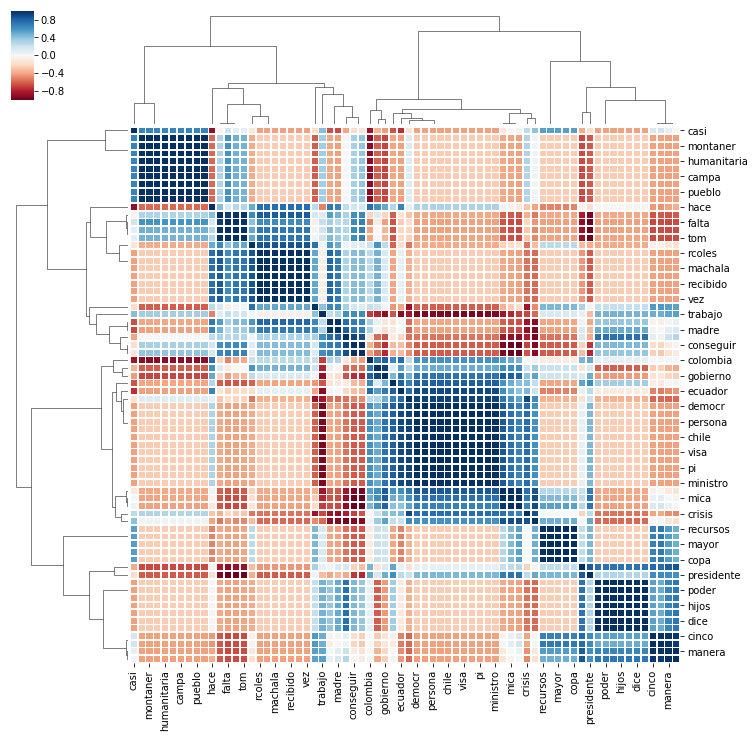

In [225]:
print('---------Cluster map de correlaciones cruzadas entre el top 50 de palabras para SOCIEDAD--------')
cmS=sb.clustermap(df_lda_S.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(cmS.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [226]:
noticias_Sociedad = noticias[noticias['categoria']=='Sociedad']
noticias_Sociedad

fecha_string                fecha  \
5     2018-04-09  2018-04-09T19:02:00   
7     2018-04-09  2018-04-09T08:21:00   
17    2018-04-16  2018-04-16T20:43:00   
23    2018-04-23  2018-04-23T00:00:00   
24    2018-04-23  2018-04-23T00:00:00   
25    2018-04-23  2018-04-23T00:00:00   
26    2018-04-23  2018-04-23T00:00:00   
27    2018-04-23  2018-04-23T00:00:00   
28    2018-04-23  2018-04-23T00:00:00   
29    2018-04-23  2018-04-23T00:00:00   
30    2018-04-24  2018-04-24T00:00:00   
31    2018-04-24  2018-04-24T00:00:00   
33    2018-04-24  2018-04-24T00:00:00   
35    2018-04-27  2018-04-27T18:27:00   
36    2018-04-29  2018-04-29T00:00:00   
37    2018-04-30  2018-04-30T00:00:00   
42    2018-05-07  2018-05-07T11:52:00   
56    2018-05-20  2018-05-20T16:16:00   
87    2018-06-05  2018-06-05T00:00:00   
97    2018-06-12  2018-06-12T16:17:00   
99    2018-06-18  2018-06-18T18:10:00   
101   2018-06-19  2018-06-19T17:37:00   
103   2018-06-19  2018-06-19T16:37:00   
117   2018-07-08  2018-07-08T00:00:00   
122   2018-07-17  2018-07-17T16:57:00   
124   2018-07-18  2018-07-18T19:50:00   
128   2018-07-24  2018-07-24T16:48:00   
131   2018-07-29  2018-07-29T00:00:00   
133   2018-07-30  2018-07-30T00:00:00   
137   2018-08-02  2018-08-02T00:00:00   
138   2018-08-04  2018-08-04T12:20:00   
144   2018-08-07  2018-08-07T19:43:00   
145   2018-08-08  2018-08-08T22:42:00   
148   2018-08-10  2018-08-10T00:00:00   
152   2018-08-13  2018-08-13T17:28:00   
182   2018-08-21  2018-08-21T00:00:92   
195   2018-08-23  2018-08-23T00:00:52   
284   2018-10-22  2018-10-22T00:00:00   
286   2018-10-23  2018-10-23T00:00:00   

                                                   url  \
5    https://www.eluniverso.com/noticias/2018/04/09...   
7    https://www.eluniverso.com/entretenimiento/201...   
17   https://www.eluniverso.com/noticias/2018/04/16...   
23   https://www.eluniverso.com/guayaquil/2018/04/2...   
24   https://www.eluniverso.com/guayaquil/2018/04/2...   
25   https://www.eluniverso.com/guayaquil/2018/04/2...   
26   https://www.eluniverso.com/guayaquil/2018/04/2...   
27   https://www.eluniverso.com/guayaquil/2018/04/2...   
28   https://www.eluniverso.com/guayaquil/2018/04/2...   
29   https://www.eluniverso.com/guayaquil/2018/04/2...   
30   https://www.eluniverso.com/noticias/2018/04/24...   
31   https://www.eluniverso.com/noticias/2018/04/24...   
33   https://www.eluniverso.com/noticias/2018/04/24...   
35   https://www.eluniverso.com/noticias/2018/04/27...   
36   https://www.eluniverso.com/guayaquil/2018/04/2...   
37   https://www.eluniverso.com/noticias/2018/04/30...   
42   https://www.eluniverso.com/noticias/2018/05/07...   
56   https://www.eluniverso.com/noticias/2018/05/20...   
87   https://www.eluniverso.com/guayaquil/2018/06/0...   
97   https://www.eluniverso.com/vida/2018/06/12/not...   
99   https://www.eluniverso.com/noticias/2018/06/18...   
101  https://www.eluniverso.com/noticias/2018/06/19...   
103  https://www.eluniverso.com/noticias/2018/06/19...   
117  https://www.eluniverso.com/guayaquil/2018/07/0...   
122  https://www.eluniverso.com/entretenimiento/201...   
124  https://www.eluniverso.com/noticias/nota/68659...   
128  https://www.eluniverso.com/noticias/nota/68752...   
131  https://www.eluniverso.com/noticias/2018/07/29...   
133  https://www.eluniverso.com/noticias/2018/07/30...   
137  https://www.eluniverso.com/noticias/2018/08/03...   
138  https://www.eluniverso.com/noticias/nota/68901...   
144  https://www.eluniverso.com/noticias/2018/08/07...   
145  https://www.eluniverso.com/noticias/2018/08/08...   
148  https://www.eluniverso.com/noticias/2018/08/10...   
152  https://www.eluniverso.com/noticias/2018/08/14...   
182  https://www.eluniverso.com/noticias/2018/08/21...   
195  https://www.eluniverso.com/noticias/2018/08/23...   
284  https://www.eluniverso.com/noticias/2018/10/22...   
286  https://www.eluniverso.com/noticias/2018/10/23...   

                                          

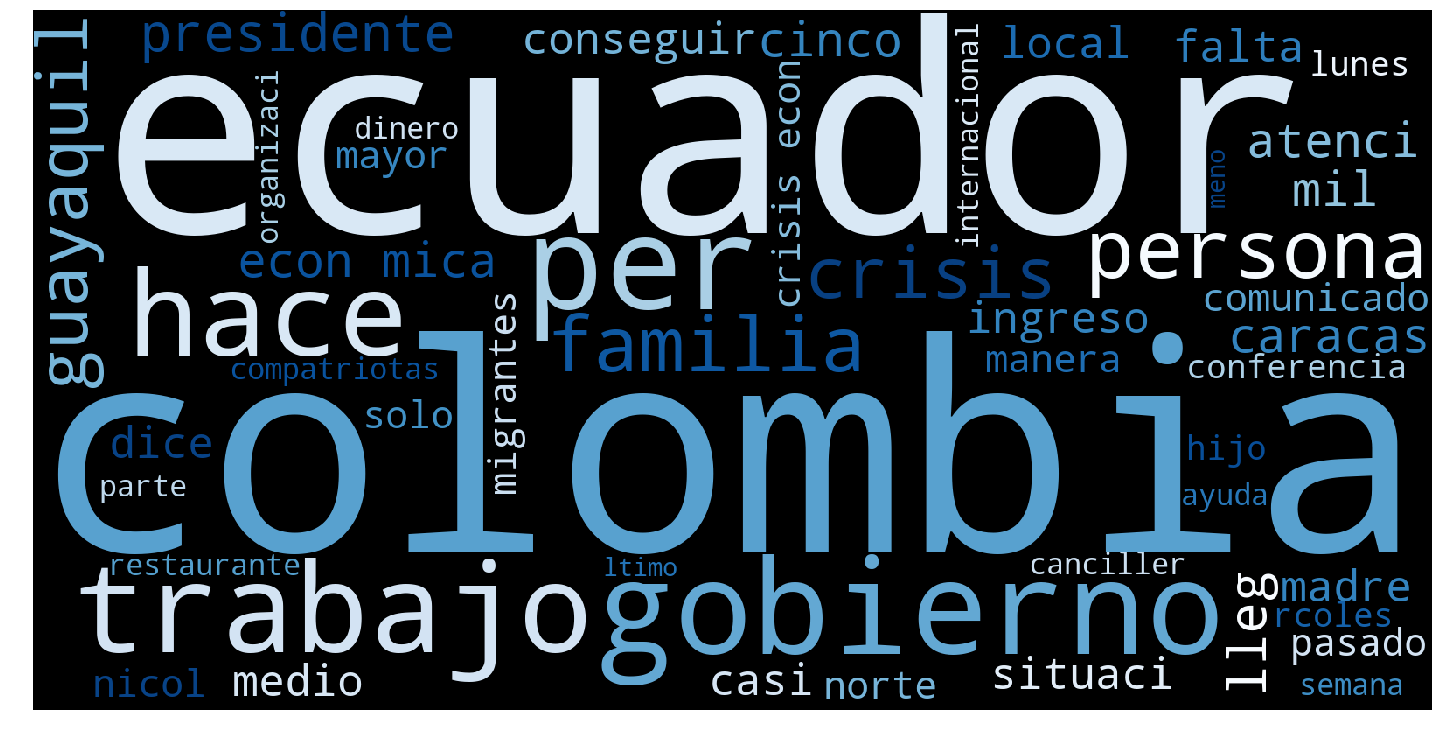

In [227]:
all_words_Soci = noticias_Sociedad['noticia_limpia'].tolist()
cleaned_words_S = []
for i in all_words_Soci:
    for j in i:
            cleaned_words_S.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_words_series_S = pd.Series(cleaned_words_S)
words_counts_S = cleaned_words_series_S.value_counts()
hashes_S = cleaned_words_series_S.values
hashes_S = hashes_S.tolist()

# convert list to one string with all the words
hashes_words_S = " ".join(hashes_S)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
from wordcloud import WordCloud
wordcloud_S = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 50).generate(hashes_words_S)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud_S)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [228]:
lista_S = hashes_S
lista_S = np.array(lista_S)
lista_S = lista_S[lista_S != ""]
lista_S = list(lista_S)
print(lista_S)

[u'gobierno', u'sebasti', u'pi', u'anunci', u'lunes', u'otorgar', u'visa', u'especial', u'responsabilidad', u'democr', u'huyen', u'crisis', u'democr', u'enfrenta', u'gobierno', u'nicol', u'impuso', u'visa', u'consular', u'restringir', u'llegada', u'haitianos', u'medio', u'mayores', u'oleadas', u'emigrantes', u'pi', u'hab', u'llegado', u'momento', u'poner', u'orden', u'hogar', u'duplicarse', u'tasa', u'extranjeros', u'viven', u'chile', u'hoy', u'alcanza', u'mill', u'persona', u'casi', u'tercio', u'situaci', u'irregular', u'caso', u'tomando', u'consideraci', u'grave', u'crisis', u'democr', u'actualmente', u'atraviesa', u'pi', u'decidi', u'crear', u'visa', u'responsabilidad', u'democr', u'deber', u'solicitada', u'consulado', u'chileno', u'caracas', u'prorrogable', u'vez', u'posibilita', u'luego', u'pedir', u'residencia', u'definitiva', u'modalidad', u'haitianos', u'haitianos', u'cambio', u'homologando', u'situaci', u'gran', u'mayor', u'am', u'latina', u'pi', u'determin', u'exigir', u'visa

In [229]:
pyLDAvis.enable_notebook()
panel_Soci = pyLDAvis.gensim.prepare(ldaS, corpus_lda_S, dictionarySoci, mds='tsne')
panel_Soci

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
4      59.795242        1       1   64.629822  124.067680
2      10.057509        1       2  140.888382 -350.433319
3      10.055826        1       3 -134.463669 -151.344864
0      10.053216        1       4  340.036652  -75.083260
1      10.038211        1       5  102.784004 -113.171959, topic_info=     Category      Freq          Term     Total  loglift  logprob
term                                                             
1268  Default  0.000000           per  0.000000  30.0000  30.0000
992   Default  0.000000       trabajo  0.000000  29.0000  29.0000
1719  Default  0.000000          tico  0.000000  28.0000  28.0000
1307  Default  0.000000       familia  0.000000  27.0000  27.0000
1087  Default  0.000000      colombia  0.000000  26.0000  26.0000
1461  Default  0.000000          lleg  0.000000  25.0000  25.0000
678   Default  0.000000          hace  0.000000  24.0000  24.0000
304   Default  0.000000      gobierno  0.000000  23.0000  23.0000
335   Default  0.000000     guayaquil  0.000000  22.0000  22.0000
1631  Default  0.000000     conseguir  0.000000  21.0000  21.0000
732   Default  0.000000           pol  0.000000  20.0000  20.0000
1096  Default  0.000000       ecuador  0.000000  19.0000  19.0000
1480  Default  0.000000         madre  0.000000  18.0000  18.0000
1200  Default  0.000000         cinco  0.000000  17.0000  17.0000
1400  Default  0.000000        sueldo  0.000000  16.0000  16.0000
1586  Default  0.000000         local  0.000000  15.0000  15.0000
1770  Default  0.000000         norte  0.000000  14.0000  14.0000
682   Default  0.000000          dice  0.000000  13.0000  13.0000
406   Default  0.000000      montaner  0.000000  12.0000  12.0000
760   Default  0.000000          casi  0.000000  11.0000  11.0000
867   Default  0.000000       domingo  0.000000  10.0000  10.0000
525   Default  0.000000        crisis  0.000000   9.0000   9.0000
521   Default  0.000000  compatriotas  0.000000   8.0000   8.0000
1774  Default  0.000000         nicol  0.000000   7.0000   7.0000
573   Default  0.000000        manera  0.000000   6.0000   6.0000
712   Default  0.000000        dinero  0.000000   5.0000   5.0000
193   Default  0.000000        rcoles  0.000000   4.0000   4.0000
602   Default  0.000000         quito  0.000000   3.0000   3.0000
1274  Default  0.000000    presidente  0.000000   2.0000   2.0000
177   Default  0.000000           tom  0.000000   1.0000   1.0000
...       ...       ...           ...       ...      ...      ...
447    Topic5  0.005957         panam  0.026016   0.8246  -6.4880
1596   Topic5  0.006028        partir  0.026611   0.8139  -6.4761
760    Topic5  0.011458          casi  0.081238   0.3401  -5.8339
674    Topic5  0.006061      derechos  0.026929   0.8075  -6.4706
1065   Topic5  0.005833      mantener  0.025558   0.8214  -6.5090
525    Topic5  0.018031        crisis  0.212752  -0.1693  -5.3804
1400   Topic5  0.010037        sueldo  0.073163   0.3124  -5.9662
822    Topic5  0.007027         manab  0.037129   0.6342  -6.3228
712    Topic5  0.007709        dinero  0.044984   0.5348  -6.2302
385    Topic5  0.006840     alcanzaba  0.035740   0.6453  -6.3498
1583   Topic5  0.005925      terminal  0.027036   0.7809  -6.4933
444    Topic5  0.007367         junto  0.044125   0.5087  -6.2756
1151   Topic5  0.008339   humanitaria  0.059022   0.3418  -6.1516
1450   Topic5  0.009446         falta  0.083406   0.1206  -6.0270
343    Topic5  0.007117     alimentos  0.044968   0.4552  -6.3101
1770   Topic5  0.007436         norte  0.050664   0.3799  -6.2662
1096   Topic5  0.011786       ecuador  0.193847  -0.5014  -5.8056
1559   Topic5  0.008376    organizaci  0.073317   0.1293  -6.1472
678    Topic5  0.009929          hace  0.126659  -0.2472  -5.9771
1175   Topic5  0.007069          tres  0.046983   0.4047  -6.3169
1665   Topic5  0.006566     medicinas  0.036836   0.5